In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [619]:
1+1

2

In [13]:
from datascience import *
import pandas as pd

So this is current work. parks (below) is the first 1000 rows of the dataset we have.

We have a couple of issues atm but basically what I want to do is be able to say that given some date in the future, what is the chance that the nearby meters are open based on past data. I want to have a table where the rows are dates/times and the columns are meters and that we can call this table for our model.

One issue is some of the Parking Start Datesand End Dates are the same. I've contacted the city about that but for now im assuming we can proxy it by writing some code to use their parking meter fees ($1 per hour to proxy the time spent)


* Segment by DoW, Hour, Month (onehot) predict by geohash, (predict number of meters filled - where there are nearby areas of high parking)
*Holiday Mutliplier

In [2]:
import pandas as pd
parks = pd.read_csv('parking_meters_data_2015_2017.csv')
parks

Pole ParkingStartDate  ParkingEndDate TransactionType  TotalCredit
0      SI83    1/1/2015 0:09   1/1/2015 0:09            Cash         0.50
1     UE255    1/1/2015 0:21   1/1/2015 0:21            Cash         0.75
2       EG6    1/1/2015 0:26   1/1/2015 0:26            Cash         0.05
3       EG6    1/1/2015 0:27   1/1/2015 0:27            Cash         0.05
4     UE242    1/1/2015 0:27   1/1/2015 0:27            Cash         0.25
5      B221    1/1/2015 0:45   1/1/2015 0:45            Cash         0.10
6     UE229    1/1/2015 0:51   1/1/2015 0:51            Cash         0.30
7     SG131    1/1/2015 1:03   1/1/2015 1:03            Cash         0.80
8     SG131    1/1/2015 1:03   1/1/2015 1:03            Cash         0.50
9     SO305    1/1/2015 1:22   1/1/2015 1:52            Cash         0.70
10    UW805    1/1/2015 1:29   1/1/2015 1:29            Cash         0.75
11    SO305    1/1/2015 1:44   1/1/2015 2:14            Cash         0.50
12    UE206    1/1/2015 1:46   1/1/2015 1:46            Cash         0.45
13    UE206    1/1/2015 1:46   1/1/2015 1:46            Cash         0.50
14    UE206    1/1/2015 1:47   1/1/2015 1:47            Cash         0.25
15    SO307    1/1/2015 1:50   1/1/2015 2:20            Cash         0.50
16    EK157    1/1/2015 2:01   1/1/2015 2:01            Cash         0.80
17    WAA50    1/1/2015 1:20   1/1/2015 1:20            Cash         0.75
18    WAA50    1/1/2015 1:45   1/1/2015 1:45            Cash         0.40
19    WAA50    1/1/2015 1:49   1/1/2015 1:49            Cash         0.10
20    SO307    1/1/2015 2:08   1/1/2015 2:38            Cash         1.00
21    EI122    1/1/2015 2:09   1/1/2015 2:09            Cash         0.25
22    UE287    1/1/2015 2:39   1/1/2015 2:39            Cash         1.00
23    UE287    1/1/2015 2:39   1/1/2015 2:39            Cash         0.25
24     WK50    1/1/2015 2:42   1/1/2015 2:42            Cash         0.75
25     WK50    1/1/2015 2:42   1/1/2015 2:42            Cash         0.25
26      SG6    1/1/2015 2:47   1/1/2015 2:47            Cash         0.25
27    UE206    1/1/2015 3:08   1/1/2015 3:08            Cash         0.25
28    UE204    1/1/2015 3:22   1/1/2015 3:22            Cash         0.25
29    SO309    1/1/2015 3:27   1/1/2015 3:57            Cash         0.50
..      ...              ...             ...             ...          ...
970   EG118   1/1/2015 18:54  1/1/2015 18:54            Cash         0.20
971    K932   1/1/2015 13:43  1/1/2015 13:43            Cash         0.50
972    K932   1/1/2015 13:44  1/1/2015 13:44            Cash         0.25
973    K932   1/1/2015 16:16  1/1/2015 16:16            Cash         0.35
974   EN250   1/1/2015 17:17  1/1/2015 17:17            Cash         0.20
975    EG16   1/1/2015 18:56  1/1/2015 18:56            Cash         0.10
976    B602   1/1/2015 18:56  1/1/2015 18:56            Cash         0.05
977    K494   1/1/2015 15:38  1/1/2015 15:38            Cash         0.15
978     EN4   1/1/2015 18:58  1/1/2015 18:58            Cash         0.30
979     EN4   1/1/2015 18:59  1/1/2015 18:59            Cash         0.25
980    K303   1/1/2015 11:20  1/1/2015 11:20            Cash         0.10
981    K303   1/1/2015 11:20  1/1/2015 11:20            Cash         0.25
982    K582   1/1/2015 14:12  1/1/2015 14:12            Cash         1.00
983    K582   1/1/2015 16:19  1/1/2015 16:19            Cash         0.35
984    B100   1/1/2015 19:01  1/1/2015 19:01            Cash         0.30
985  UW1009   1/1/2015 19:02  1/1/2015 19:02            Cash         0.10
986   SK210   1/1/2015 12:54  1/1/2015 12:54            Cash         0.95
987   SO307   1/1/2015 19:04  1/1/2015 19:19            Cash         0.25
988   UE563   1/1/2015 19:04  1/1/2015 19:04            Cash         0.05
989   UE501   1/1/2015 19:05  1/1/2015 19:05            Cash         0.75
990   UE802   1/1/2015 19:06  1/1/2015 19:06            Cash         0.25
991  UW1003   1/1/2015 19:09  1/1/2015 19:09            Cash         0.25
992   UE475

In [3]:
#THIS CODE LETS US See the difference between the start and end time.

from datetime import datetime
from dateutil import parser


diff = []
for each in range(1000):
    dtstart = parser.parse(parks['ParkingStartDate'][each])
    dtend = parser.parse(parks['ParkingEndDate'][each])
    diff.append(dtend-dtstart)
#datetime_object = datetime.strptime(parks['ParkingStartDate'][0], '%b/%d/%Y %I:%M')

In [4]:
parks["Diff"] = diff

In [350]:
time_changed_parks = parks[parks["Diff"] != (parks["Diff"][0])]
len(time_changed_parks)

188

In [349]:
#THIS IS THE 1000 ROWS FROM EARLIER WITHOUT THE ONES WITH ZERO TIME DIFF
time_changed_parks.tail(5)


Pole ParkingStartDate  ParkingEndDate TransactionType  TotalCredit  \
956  SO305   1/1/2015 18:30  1/1/2015 18:48            Cash         0.25   
987  SO307   1/1/2015 19:04  1/1/2015 19:19            Cash         0.25   
996  SO305   1/1/2015 19:13  1/1/2015 19:43            Cash         0.50   
997  SO307   1/1/2015 19:14  1/1/2015 19:22            Cash         0.05   
998  SO307   1/1/2015 19:14  1/1/2015 19:44            Cash         0.90   

        Diff  count  
956 00:18:00    1.0  
987 00:15:00    1.0  
996 00:30:00    1.0  
997 00:08:00    1.0  
998 00:30:00    1.0

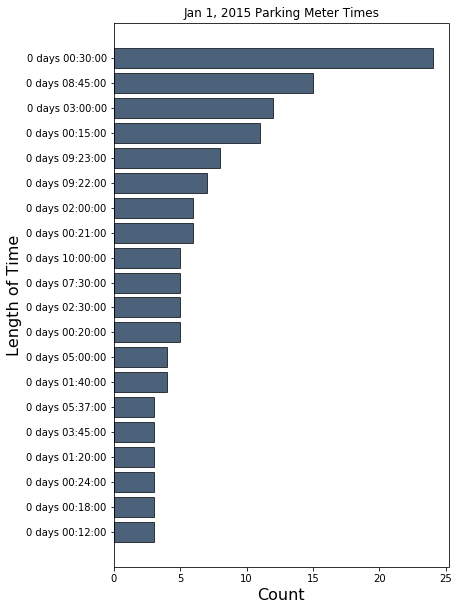

In [17]:
#THIS IS WHAT THE MOST COMMON TIME DIFFS WERE
ex = Table().from_df(time_changed_parks).group('Diff', sum).select(0,6)
ex.sort('count sum',descending=True).take(np.arange(20)).barh("Diff", "count sum")
plt.title('Jan 1, 2015 Parking Meter Times')
plt.xlabel('Count')
plt.ylabel('Length of Time')
plt.show()

In [18]:
#THIS IS IMPORTANT: PM IS ALL THE METERS IN COLUMBUS.
pm = Table.read_table('Parking_Meters.csv')
pm

X        | Y       | OBJECTID | METER_ID | LOCATION      | SIDE_OF_STREET | BLOCKFACE              | METER_STATUS         | TOW_AWAY_HOURS        | METER_TIME | HANDICAP | HOURS_OPERATION | IN_SERVICE | VALET_HOURS | RATE   | FOOD_SERVICE_HOURS | TAXI_ZONE_HOURS | CHARGING_STATION | CHARGING_STATION_STATUS
-83.0103 | 39.9603 | 6111     | C401     | STARLING ST S | West           | CAPITAL ST - RUSH AL   | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0103 | 39.9602 | 6112     | C403     | STARLING ST S | West           | CAPITAL ST - RUSH AL   | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0087 | 39.9578 | 5495     | C867     | TOWN ST W     | South          | BELLE ST - STARLING ST | Meter & Post Removed | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0086 | 39.9578 | 5494     | C869     | TOWN ST W     | South          | BELLE ST - STARLING ST | Meter & Post Removed | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0085 | 39.9578 | 5493     | C871     | TOWN ST W     | South          | BELLE ST - STARLING ST | Meter & Post Removed | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0087 | 39.9592 | 6110     | C728     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0088 | 39.9592 | 6109     | C730     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0089 | 39.9592 | 6108     | C732     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0092 | 39.9592 | 6106     | C738     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0093 | 39.9592 | 6105     | C740     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational          | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
... (5664 rows omitted)

In [339]:
#THIS IS THE HOURS OF OPERATION
np.unique(pm["HOURS_OPERATION"])

array(['10 AM - 6 PM', '4 PM - 10 PM', '6 AM - 10 PM',
       '6 AM - 10 PM MON - SAT', '6 AM - 10 PM-M-S', '6 AM - 6 PM',
       '6 PM - 10 PM', '8 AM - 10 PM', '8 AM - 4 PM', '8 AM - 5 PM',
       '8 AM - 6 PM', '8 AM - 8 PM', '8 AM - 9 PM',
       '8AM - 10AM & 4PM - 10PM', '8AM - 4PM & 6PM - 10PM',
       '8AM - 5PM & 5PM - 10PM', '8AM-3PM-6PM-10PM', '8AM-4PM-6PM-10PM',
       '8AM-5PM', '9 AM - 10 PM', '9 AM - 3 PM', '9 AM - 4 PM',
       '9AM - 3PM & 6PM - 10PM', '9AM - 4PM & 6PM - 10PM',
       '9AM-4PM-6PM-10PM', 'nan'], dtype='<U23')

In [354]:
#THIS IS THE COORDINATES OF EACH METER
shortpm = pm.select(0,1,3).to_df()
shortpm.head(5)

X          Y METER_ID
0 -83.010278  39.960264     C401
1 -83.010269  39.960203     C403
2 -83.008661  39.957754     C867
3 -83.008583  39.957763     C869
4 -83.008515  39.957769     C871

Text(0.5, 1.0, 'Plotted Parking Meters On Jan 1 in Columbus')

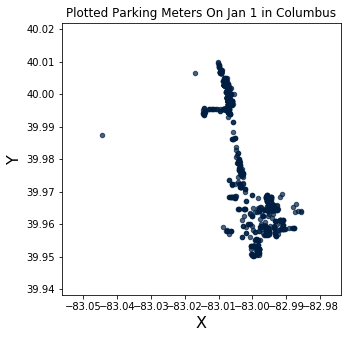

In [21]:
# PLOTTED METERS IN Columbus, OH
parksDS = Table().from_df(parks)
finalDS = parksDS.join('Pole', shortpm, "METER_ID")
finalDS.scatter('X', "Y")
plt.title('Plotted Parking Meters On Jan 1 in Columbus')

# #THIS IS MY ATTEMPT AT GIS MAPPING THE SPOTS

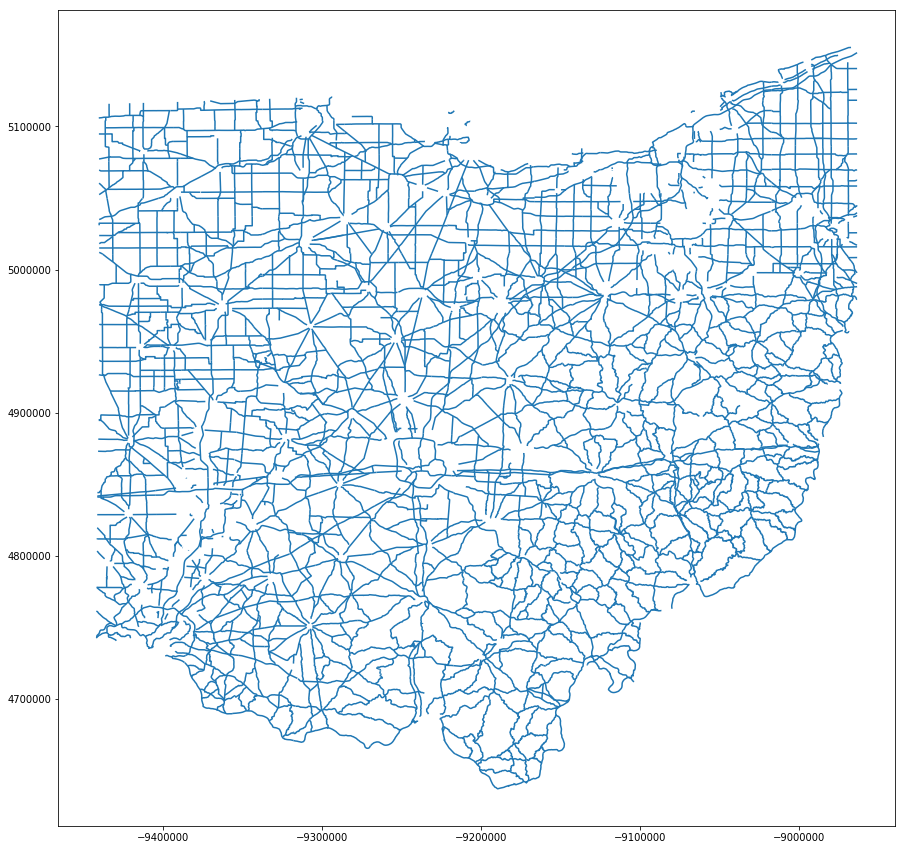

In [87]:
#THIS IS MY ATTEMPT AT GIS MAPPING THE SPOTS
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
street_map = gpd.read_file('WGIS_SNOW_ICE.shp')
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [91]:
final = finalDS.to_df()
geomtrey = [Point(xy) for xy in zip(final["Y"], final["X"])]

In [127]:
crs = {'init': 'epsg:4326'}
crs

{'init': 'epsg:4326'}

In [117]:
geoDF = gpd.GeoDataFrame(final, crs=crs, geometry=geomtrey)
geoDF.tail()

Pole ParkingStartDate  ParkingEndDate TransactionType  TotalCredit  \
985  WX161   1/1/2015 13:43  1/1/2015 13:43            Cash         0.25   
986  WX163   1/1/2015 14:05  1/1/2015 14:05            Cash         0.35   
987  WX171   1/1/2015 14:25  1/1/2015 14:25            Cash         0.75   
988  WX175   1/1/2015 10:06  1/1/2015 10:06            Cash         0.50   
989  WX175   1/1/2015 10:07  1/1/2015 10:07            Cash         0.25   

      Diff          X          Y                                      geometry  
985 0 days -83.006212  39.968411  POINT (39.96841098150934 -83.00621186037043)  
986 0 days -83.006277  39.968404  POINT (39.96840430119906 -83.00627704461081)  
987 0 days -83.006640  39.968361  POINT (39.96836093232832 -83.00663972624859)  
988 0 days -83.006807  39.968343  POINT (39.96834275656712 -83.00680695240848)  
989 0 days -83.006807  39.968343  POINT (39.96834275656712 -83.00680695240848)

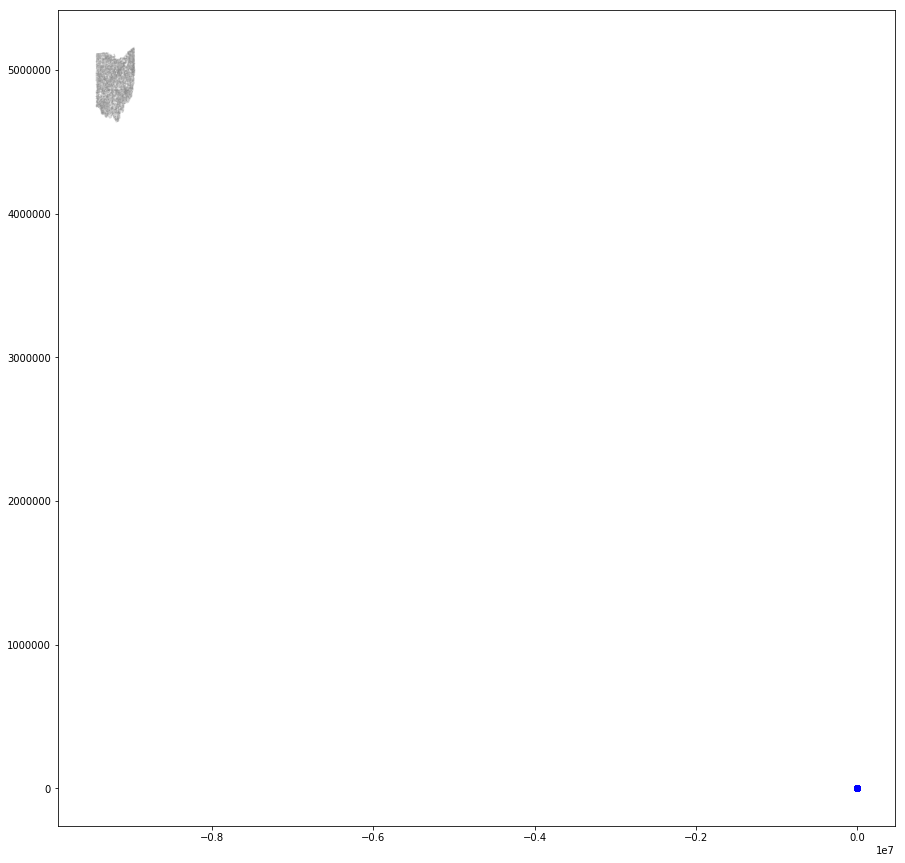

In [126]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=.3, color='grey')
geoDF[geoDF["Y"]>32].plot(ax=ax, markersize=25, color='blue')


In [115]:

pd.options.display.max_rows=1000

In [116]:
geoDF

Pole ParkingStartDate  ParkingEndDate TransactionType  TotalCredit  \
0      B100   1/1/2015 11:35  1/1/2015 11:35            Cash         0.50   
1      B100   1/1/2015 11:35  1/1/2015 11:35            Cash         0.60   
2      B100   1/1/2015 13:04  1/1/2015 13:04            Cash         0.50   
3      B100   1/1/2015 19:01  1/1/2015 19:01            Cash         0.30   
4      B102    1/1/2015 9:19   1/1/2015 9:19            Cash         0.50   
5      B102    1/1/2015 9:20   1/1/2015 9:20            Cash         0.25   
6      B104   1/1/2015 11:56  1/1/2015 11:56            Cash         0.25   
7      B157   1/1/2015 13:30  1/1/2015 13:30            Cash         0.50   
8      B159   1/1/2015 11:13  1/1/2015 11:13            Cash         0.50   
9      B163   1/1/2015 11:34  1/1/2015 11:34            Cash         0.35   
10     B201   1/1/2015 18:15  1/1/2015 18:15            Cash         0.25   
11     B201   1/1/2015 18:16  1/1/2015 18:16            Cash         0.15   
12     B207   1/1/2015 18:36  1/1/2015 18:36            Cash         0.75   
13     B221    1/1/2015 0:45   1/1/2015 0:45            Cash         0.10   
14     B226   1/1/2015 15:06  1/1/2015 15:06            Cash         0.25   
15      B27   1/1/2015 12:07  1/1/2015 12:07            Cash         0.35   
16     B504   1/1/2015 11:03  1/1/2015 11:03            Cash         0.50   
17      B51   1/1/2015 11:52  1/1/2015 11:52            Cash         0.50   
18      B51   1/1/2015 11:52  1/1/2015 11:52            Cash         0.25   
19      B51   1/1/2015 12:03  1/1/2015 12:03            Cash         0.50   
20      B53   1/1/2015 11:13  1/1/2015 11:13            Cash         0.15   
21     B538   1/1/2015 15:13  1/1/2015 15:13            Cash         0.10   
22     B538   1/1/2015 15:14  1/1/2015 15:14            Cash         0.10   
23     B544   1/1/2015 13:02  1/1/2015 13:02            Cash         0.05   
24     B544   1/1/2015 13:02  1/1/2015 13:02            Cash         0.25   
25      B55   1/1/2015 12:26  1/1/2015 12:26            Cash         0.25   
26      B55   1/1/2015 12:36  1/1/2015 12:36            Cash         0.50   
27      B55   1/1/2015 12:36  1/1/2015 12:36            Cash         0.25   
28      B55   1/1/2015 12:43  1/1/2015 12:43            Cash         0.05   
29     B563   1/1/2015 17:19  1/1/2015 17:19            Cash         0.50   
30     B569   1/1/2015 11:55  1/1/2015 11:55            Cash         0.25   
31      B57   1/1/2015 12:36  1/1/2015 12:36            Cash         0.25   
32      B59   1/1/2015 12:13  1/1/2015 12:13            Cash         0.25   
33      B59   1/1/2015 12:13  1/1/2015 12:13            Cash         0.25   
34      B59   1/1/2015 12:33  1/1/2015 12:33            Cash         0.60   
35     B602   1/1/2015 12:12  1/1/2015 12:12            Cash         0.50   
36     B602   1/1/2015 16:02  1/1/2015 16:02            Cash         0.30   
37     B602   1/1/2015 18:56  1/1/2015 18:56            Cash         0.05   
38     B604   1/1/2015 10:53  1/1/2015 10:53            Cash         0.50   
39     B604   1/1/2015 10:54  1/1/2015 10:54            Cash         0.25   
40     B605   1/1/2015 12:32  1/1/2015 12:32            Cash         0.50   
41     B606   1/1/2015 11:51  1/1/2015 11:51            Cash         0.25   
42     B608   1/1/2015 11:31  1/1/2015 11:31            Cash         0.50   
43     B608   1/1/2015 13:07  1/1/2015 13:07            Cash         0.25   
44     B608   1/1/2015 13:58  1/1/2015 13:58            Cash         0.50   
45     B608   1/1/2015 13:59  1/1/2015 13:59            Cash         0.25   
46     B610   1/1/2015 14:40  1/1/2015 14:40            Cash         0.20   
47     B610   1/1/2015 14:48  1/1/2015 14:48            Cash         0.25   
48     B610   1/1/2015 15:00  1/1/2015 15:00            Cash         0.10   
49     B610   1/1/2015 15:00  1/1/2015 15:00            Cash         0.25   
50     B610   1/1/2015 16:33  1/1/2015 16:33            Cash         0.25   
51 

# Back to the model

In [25]:
pm.group('METER_STATUS')

METER_STATUS         | count
Bagged - Paid        | 455
Meter & Post Removed | 1043
No Head - Paid       | 10
No Head - Unpaid     | 13
Operational          | 4139
Out of Service       | 3
Post Removed - Paid  | 3
Proposed             | 1
nan                  | 7

In [52]:
# Just the 4000 meters currently operational.
operationalmeters = pm.where('METER_STATUS', are.equal_to('Operational'))
operationalmeters

X        | Y       | OBJECTID | METER_ID | LOCATION      | SIDE_OF_STREET | BLOCKFACE              | METER_STATUS | TOW_AWAY_HOURS        | METER_TIME | HANDICAP | HOURS_OPERATION | IN_SERVICE | VALET_HOURS | RATE   | FOOD_SERVICE_HOURS | TAXI_ZONE_HOURS | CHARGING_STATION | CHARGING_STATION_STATUS
-83.0103 | 39.9603 | 6111     | C401     | STARLING ST S | West           | CAPITAL ST - RUSH AL   | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0103 | 39.9602 | 6112     | C403     | STARLING ST S | West           | CAPITAL ST - RUSH AL   | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0087 | 39.9592 | 6110     | C728     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0088 | 39.9592 | 6109     | C730     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0089 | 39.9592 | 6108     | C732     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0092 | 39.9592 | 6106     | C738     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0093 | 39.9592 | 6105     | C740     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0093 | 39.9592 | 6104     | C742     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0094 | 39.9592 | 6102     | C744     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
-83.0097 | 39.9591 | 6095     | C748     | STATE ST W    | North          | BELLE ST - STARLING ST | Operational  | 3AM - 7AM - 4PM - 6PM | 720        | 0        | 6 AM - 6 PM     | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
... (4129 rows omitted)

In [61]:
#DISTANCE TO NEAREST METER
import math

def distance_tometers(x,y):
    x1 = x
    y1 = y
    min_dist = 100000000000000
    curr = 0
    for each in np.arange(operationalmeters.num_rows):
        x2 = operationalmeters[0][each]
        y2 = operationalmeters[1][each]
        dist = math.hypot(x2 - x1, y2 - y1)
        if min_dist > dist: 
            min_dist = dist
            curr = operationalmeters[3][each]
    return curr, min_dist

distance_tometers(-84, 40)

('G1', 0.9553183583924237)

In [34]:
#EDA: Full meter info
joinedDF = parksDS.join('Pole', pm, "METER_ID")
joinedDF = joinedDF.to_df()
joinedDF = Table().from_df(joinedDF[joinedDF["Diff"] != (joinedDF["Diff"][0])])
joinedDF

Pole  | ParkingStartDate | ParkingEndDate | TransactionType | TotalCredit | Diff            | X        | Y       | OBJECTID | LOCATION          | SIDE_OF_STREET | BLOCKFACE             | METER_STATUS | TOW_AWAY_HOURS        | METER_TIME | HANDICAP | HOURS_OPERATION        | IN_SERVICE | VALET_HOURS | RATE   | FOOD_SERVICE_HOURS | TAXI_ZONE_HOURS | CHARGING_STATION | CHARGING_STATION_STATUS
C203  | 1/2/2015 8:40    | 1/2/2015 14:55 | Credit Card     | 2.5         | 0 days 06:15:00 | -83.0064 | 39.9578 | 10055    | WASHINGTON BLVD S | West           | RICH ST - TOWN ST     | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EE102 | 1/2/2015 9:02    | 1/2/2015 9:42  | Cash            | 0.5         | 0 days 00:40:00 | -82.9965 | 39.9566 | 5341     | MAIN ST E         | North          | LAZELLE ST - THIRD ST | Operational  | 3AM - 7AM - 4PM - 6PM | 120        | 0        | 8AM - 4PM & 6PM - 10PM | 12         | nan         |  $1.50 | nan                | nan             | No               | nan
EE315 | 1/2/2015 8:21    | 1/2/2015 9:01  | Cash            | 0.5         | 0 days 00:40:00 | -82.9924 | 39.9569 | 5224     | MAIN ST E         | South          | FIFTH ST - GRANT AVE  | Operational  | 4PM - 6PM             | 120        | 0        | 8 AM - 6 PM            | 10         | nan         |  $1.50 | nan                | nan             | No               | nan
EG322 | 1/2/2015 7:48    | 1/2/2015 18:25 | Credit Card     | 4.25        | 0 days 10:37:00 | -82.9915 | 39.9585 | 5281     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG324 | 1/2/2015 6:49    | 1/2/2015 16:49 | Credit Card     | 4           | 0 days 10:00:00 | -82.9915 | 39.9585 | 5280     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG326 | 1/2/2015 6:37    | 1/2/2015 15:59 | Credit Card     | 3.75        | 0 days 09:22:00 | -82.9911 | 39.9586 | 5279     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG328 | 1/2/2015 6:41    | 1/2/2015 11:41 | Cash            | 2           | 0 days 05:00:00 | -82.991  | 39.9586 | 5278     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG328 | 1/2/2015 6:41    | 1/2/2015 14:11 | Cash            | 1           | 0 days 07:30:00 | -82.991  | 39.9586 | 5278     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG334 | 1/2/2015 6:49    | 1/2/2015 15:34 | Credit Card     | 3.5         | 0 days 08:45:00 | -82.9905 | 39.9586 | 5277     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 6 AM - 6 PM            | 12         | nan         |  $4.80 | nan                | nan             | No               | nan
EG336 | 1/2/2015 6:48    | 1/2/2015 15:33 | Credit Card     | 3.5         | 0 days 08:45:00 | -82.9904 | 39.9586 | 5276     | RICH ST E         | North          | FIFTH ST - GRANT AVE  | Operational  | nan                   | 720        | 0        | 

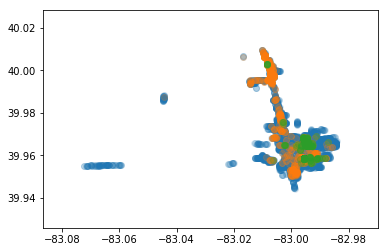

In [45]:
# PM is all meters
# finalDS is those in the sample data set
#joinedDF is those that have diff start and end dates
plt.scatter(pm["X"], pm["Y"], alpha=.1)

#joinedDF.scatter('X', "Y")
plt.scatter(finalDS["X"],finalDS["Y"],alpha=.2)
plt.scatter(joinedDF["X"], joinedDF["Y"],alpha=.3)

#finalDS.scatter('X', "Y")


In [48]:
#SEARCHING FOR PARKING DATASET
Table().read_table('urbaninfrastructure_searchingforparking_csv_searchingforparking.csv')

ParkingGeohash | AvgLatitude | AvgLongitude | City     | County   | State | Country                  | ISO_3166_2 | AvgTimeToPark | AvgTimeToParkRatio | TotalSearching | PercentSearching | AvgUniqueGeohashes | AvgTotalGeohashes | CirclingDistribution                                         | HourlyDistribution                                           | PercentCar | PercentMPV | PercentLDT | PercentMDT | PercentHDT | PercentOther | UpdateDate | Version
dphghs8        | 39.9272     | -83.1215     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 6.0181        | 1.1101             | 12             | 0.096            | 5.9167             | 8                 | {"dphghs3":0.1006, "dphghkx":0.0562, "dphghs2":0.1879, " ... | {"00": null, "01": null, "02": null, "03": 0.2, "04": 0. ... | 0          | 0          | 0          | 0          | 0.5        | 0.5          | 2018-05-02 | 1.1
dphgvtg        | 40.066      | -83.0739     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 3.4738        | 1.0164             | 14             | 0.2029           | 4.3571             | 6.3571            | {"dphgvtf":0.0984, "dphgvtd":0.1785, "dphgvw4":0.04, "dp ... | {"00": null, "01": null, "02": null, "03": 0.1429, "04": ... | 0          | 0          | 0          | 0          | 0.6429     | 0.3571       | 2018-05-02 | 1.1
dphgupj        | 40.0733     | -83.1368     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 4.0167        | 1.1655             | 13             | 0.0813           | 5.1538             | 7.3846            | {"dphgupn":0.1154, "dphgupj":0.3818, "dphgunu":0.058, "d ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0          | 0          | 0          | 0.9231     | 0.0769       | 2018-05-02 | 1.1
dpj56ve        | 39.9775     | -82.8437     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 4.8716        | 3.4115             | 8              | 0.4211           | 4.25               | 6.5673            | {"dpj56ve":0.172, "dpj56vg":0.2548, "dpj56vf":0.0628, "d ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0.125      | 0          | 0.125      | 0.625      | 0.125        | 2018-05-02 | 1.1
dpj5391        | 39.9531     | -82.9011     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 4.6896        | 1.0568             | 8              | 0.1667           | 4.375              | 8.875             | {"dpj5393":0.0191, "dpj5390":0.0621, "dpj5391":0.4065, " ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0          | 0          | 0          | 0.875      | 0.125        | 2018-05-02 | 1.1
dphgm1f        | 39.9569     | -83.0972     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 2.9           | 1.2279             | 14             | 0.1707           | 4.7143             | 7                 | {"dphgm1g":0.1085, "dphgm44":0.1523, "dphgm41":0.0649, " ... | {"00": null, "01": null, "02": 0.2, "03": 0.2, "04": 0.2 ... | 0          | 0          | 0          | 0          | 0.3571     | 0.6429       | 2018-05-02 | 1.1
dphgup7        | 40.0743     | -83.1396     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 3.3389        | 2.0977             | 9              | 0.5294           | 5                  | 7.8889            | {"dphgups":0.0296, "dphgupk":0.1662, "dphgup5":0.2132, " ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0          | 0          | 0          | 0.8889     | 0.1111       | 2018-05-02 | 1.1
dphgwcj        | 39.9964     | -83.0162     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 7.47          | 1.7766             | 5              | 0.122            | 4.4                | 7.4               | {"dphgwbv":0.0288, "dphgwcn":0.3225, "dphgwby":0.1434, " ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0.2

In [50]:
#FULL DATASET
full_data = pd.read_csv('parking_meter_data_2015_-_2017.csv')
full_data

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Pole     ParkingStartDate       ParkingEndDate TransactionType  \
0          SI83  2015-01-01 00:09:24  2015-01-01 00:09:24            Cash   
1         UE255  2015-01-01 00:21:22  2015-01-01 00:21:22            Cash   
2           EG6  2015-01-01 00:26:42  2015-01-01 00:26:42            Cash   
3           EG6  2015-01-01 00:27:02  2015-01-01 00:27:02            Cash   
4         UE242  2015-01-01 00:27:16  2015-01-01 00:27:16            Cash   
5          B221  2015-01-01 00:45:36  2015-01-01 00:45:36            Cash   
6         UE229  2015-01-01 00:51:44  2015-01-01 00:51:44            Cash   
7         SG131  2015-01-01 01:03:04  2015-01-01 01:03:04            Cash   
8         SG131  2015-01-01 01:03:28  2015-01-01 01:03:28            Cash   
9         SO305  2015-01-01 01:22:26  2015-01-01 01:52:26            Cash   
10        UW805  2015-01-01 01:29:42  2015-01-01 01:29:42            Cash   
11        SO305  2015-01-01 01:44:32  2015-01-01 02:14:32            Cash   
12        UE206  2015-01-01 01:46:00  2015-01-01 01:46:00            Cash   
13        UE206  2015-01-01 01:46:39  2015-01-01 01:46:39            Cash   
14        UE206  2015-01-01 01:47:05  2015-01-01 01:47:05            Cash   
15        SO307  2015-01-01 01:50:58  2015-01-01 02:20:58            Cash   
16        EK157  2015-01-01 02:01:30  2015-01-01 02:01:30            Cash   
17        WAA50  2015-01-01 01:20:01  2015-01-01 01:20:01            Cash   
18        WAA50  2015-01-01 01:45:37  2015-01-01 01:45:37            Cash   
19        WAA50  2015-01-01 01:49:17  2015-01-01 01:49:17            Cash   
20        SO307  2015-01-01 02:08:10  2015-01-01 02:38:10            Cash   
21        EI122  2015-01-01 02:09:41  2015-01-01 02:09:41            Cash   
22        UE287  2015-01-01 02:39:11  2015-01-01 02:39:11            Cash   
23        UE287  2015-01-01 02:39:48  2015-01-01 02:39:48            Cash   
24         WK50  2015-01-01 02:42:07  2015-01-01 02:42:07            Cash   
25         WK50  2015-01-01 02:42:23  2015-01-01 02:42:23            Cash   
26          SG6  2015-01-01 02:47:19  2015-01-01 02:47:19            Cash   
27        UE206  2015-01-01 03:08:48  2015-01-01 03:08:48            Cash   
28        UE204  2015-01-01 03:22:29  2015-01-01 03:22:29            Cash   
29        SO309  2015-01-01 03:27:32  2015-01-01 03:57:32            Cash   
...         ...                  ...                  ...             ...   
19086738    EP9  2017-10-28 17:37:48  2017-10-28 18:44:05            Cash   
19086739   EP59  2017-10-28 17:39:33  2017-10-28 19:47:41     Credit Card   
19086740   WT13  2017-10-28 17:39:46  2017-10-28 20:39:46     Credit Card   
19086741  UW611  2017-10-28 17:40:03  2017-10-28 19:40:03     Credit Card   
19086742  UE582  2017-10-28 17:37:43  2017-10-28 19:35:20            Cash   
19086743   K747  2017-10-28 17:38:48  2017-10-28 18:47:02            Cash   
19086744   K747  2017-10-28 17:38:55  2017-10-28 19:07:02            Cash   
19086745  UW601  2017-10-28 17:40:21  2017-10-28 19:40:21     Credit Card   
19086746  UE313  2017-10-28 17:37:44  2017-10-28 17:53:44            Cash   
19086747   SK57  2017-10-28 17:40:34  2017-10-28 18:00:34     Credit Card   
19086748   K758  2017-10-28 17:40:48  2017-10-28 19:52:00     Credit Card   
19086749  WBB51  2017-10-28 17:39:00  2017-10-28 20:36:09            Cash   
19086750  UE337  2017-10-28 17:41:13  2017-10-28 19:41:13     Credit Card   
19086751  NH353  2017-10-28 17:41:11  2017-10-28 19:41:11     Credit Card   
19086752   K865  2017-10-28 17:41:27  2017-10-28 20:11:20     Credit Card   
19086753  UE337  2017-10-28 13:04:18  2017-10-28 14:52:22            Cash   
19086754  UE337  2017-10-28 13:38:23  2017-10-28 15:38:23     Credit Card   
19086755  UE337  2017-10-28 13:04:38  2017-10-28 15:04:38            Cash   
19086756  UE337  2017-10-28 15:12:08  2017-10-28 16:46:23            Cash   
19086757   B608  2017-10-28 17:42:08  2017-10-28 18:02:08     Credit Card   
1908675

In [89]:
#ADDING DIFFERENCE IN DATES
full_data['DifferenceAsDateTime'] = pd.to_datetime(full_data['ParkingEndDate'], errors='coerce') - pd.to_datetime(full_data['ParkingStartDate'], errors='coerce')


In [94]:
full_data['DifferenceAsDateTime'].sort_values()

0          00:00:00
3253955    00:00:00
3253956    00:00:00
3253957    00:00:00
3253958    00:00:00
3253959    00:00:00
3253961    00:00:00
15531684   00:00:00
3253962    00:00:00
3253964    00:00:00
3253965    00:00:00
3253966    00:00:00
3253967    00:00:00
3253968    00:00:00
3253969    00:00:00
3253963    00:00:00
3253953    00:00:00
3253952    00:00:00
3253951    00:00:00
3253936    00:00:00
3253937    00:00:00
3253938    00:00:00
3253939    00:00:00
3253940    00:00:00
3253941    00:00:00
3253942    00:00:00
3253943    00:00:00
3253944    00:00:00
3253945    00:00:00
3253946    00:00:00
             ...   
14557804   12:48:15
14621672   12:49:34
15029215   12:49:51
14540607   12:51:10
5848712    12:51:21
14314456   12:51:28
14726943   12:51:28
11504598   12:51:29
13324471   12:51:35
14422378   12:51:47
14817059   12:51:57
14920547   12:53:03
14877499   12:53:16
1755462    12:53:20
14835356   12:53:49
15278652   12:54:21
14791050   12:54:25
14474763   12:55:22
14663275   12:55:28


In [102]:
full_data = full_data.drop([1523047, 3195633,4863068])

In [105]:
full_data.loc[0][5]

Timedelta('0 days 00:00:00')

In [117]:
#NUMBER OF PARKED BY METTER
full_data.groupby("Pole").count().sort_values(by=["TotalCredit"])#[["TotalCredit"]].hist()

ParkingStartDate  ParkingEndDate  TransactionType  TotalCredit  \
Pole                                                                    
EZ577                 1               1                1            1   
EZ579                 1               1                1            1   
EZ573                 2               2                2            2   
EZ581                 2               2                2            2   
EZ575                 3               3                3            3   
EZ567                 4               4                4            4   
EZ583                 5               5                5            5   
NL111                 6               6                6            6   
EZ571                 7               7                7            7   
EZ585                 8               8                8            8   
EZ565                 9               9                9            9   
EN708                10              10               10           10   
SQ600                10              10               10           10   
EZ569                11              11               11           11   
SQ602                13              13               13           13   
NZ159                14              14               14           14   
SO657                14              14               14           14   
EI225                17              17               17           17   
EZ561                17              17               17           17   
NK100                19              19               19           19   
WR107                20              20               20           20   
SO659                21              21               21           21   
NI105                23              23               23           23   
B918                 24              24               24           24   
NZ157                24              24               24           24   
EZ563                25              25               25           25   
WR109                27              27               27           27   
NI107                29              29               29           29   
EZ559                30              30               30           30   
EA411                30              30               30           30   
...                 ...             ...              ...          ...   
UE252             13813           13813            13813        13813   
EP11              13926           13926            13926        13926   
UE614             13927           13927            13927        13927   
UE153             13935           13935            13935        13935   
UW611             14203           14203            14203        14203   
UE700             14308           14308            14308        14308   
UW613             14322           14322            14322        14322   
SO305             14359           14359            14359        14359   
EN60              14408           14408            14408        14408   
UE152             14414           14414            14414        14414   
UE150             14454           14454            14454        14454   
UW615             15253           15253            15253        15253   
UE702             15311           15311            15311        15311   
EC4               15835           15835            15835        15835   
NI602             15851           15851            15851        15851   
NI600             16277           16277            16277        16277   
NI604             16354           16354            16354        16354   
UE704             16484           16484            16484        16484   
UW99              16740           16740            16740        16740   
EC2               16854           16854            16854        16854   
EP6               16859           16859            16859        16859   
NI606             17094           17094            17094        1

In [121]:
#MOST COMMON METER
uw97 = Table().from_df(full_data.loc[full_data['Pole'] == "UW97"])
uw97

Pole | ParkingStartDate    | ParkingEndDate      | TransactionType | TotalCredit | DifferenceAsDateTime
UW97 | 2015-01-02 07:58:22 | 2015-01-02 08:15:01 | Cash            | 0.25        | 0 days 00:16:39
UW97 | 2015-01-02 08:15:13 | 2015-01-02 08:30:13 | Cash            | 0.25        | 0 days 00:15:00
UW97 | 2015-01-02 08:47:03 | 2015-01-02 09:02:03 | Cash            | 0.25        | 0 days 00:15:00
UW97 | 2015-01-02 10:41:17 | 2015-01-02 10:47:17 | Cash            | 0.1         | 0 days 00:06:00
UW97 | 2015-01-02 11:07:37 | 2015-01-02 11:22:37 | Cash            | 0.25        | 0 days 00:15:00
UW97 | 2015-01-02 11:22:47 | 2015-01-02 11:52:47 | Cash            | 0.5         | 0 days 00:30:00
UW97 | 2015-01-02 12:01:45 | 2015-01-02 12:19:45 | Cash            | 0.3         | 0 days 00:18:00
UW97 | 2015-01-02 12:05:18 | 2015-01-02 12:35:18 | Cash            | 0.5         | 0 days 00:30:00
UW97 | 2015-01-02 12:40:17 | 2015-01-02 13:10:17 | Cash            | 0.5         | 0 days 00:30:00
UW97 | 2015-01-02 12:54:50 | 2015-01-02 13:16:17 | Cash            | 0.1         | 0 days 00:21:27
... (21686 rows omitted)

In [169]:
#CLEANING TIME DATA FOR UW97
a,b,c = [],[],[]
a2,b2,c2 = [],[],[]
for each in np.arange((uw97.num_rows)):
    a.append(uw97[1][each][0:10])
    b.append(uw97[1][each][11:13])
    c.append(uw97[1][each][14:16])
    a2.append(uw97[2][each][0:10])
    b2.append(uw97[2][each][11:13])
    c2.append(uw97[2][each][14:16])
uw97 = uw97.with_columns("StartDate",a, "StartHour", b, "StartMinute", c, "EndDate",a2, "EndHour", b2, "EndMinute", c2)
uw97.group('StartHour').show()

In [154]:
# HOW MANY ON EASCH DATE IN EACH HOUR
uw97.groups(["StartDate", "Hour"]).sort("count",descending=True)

StartDate  | Hour | count
2015-08-12 | 19   | 8
2017-08-23 | 11   | 7
2017-08-21 | 09   | 7
2016-02-05 | 11   | 7
2015-01-16 | 14   | 7
2017-06-01 | 11   | 6
2017-04-21 | 18   | 6
2017-01-09 | 16   | 6
2016-11-29 | 13   | 6
2016-11-11 | 12   | 6
... (11039 rows omitted)

In [155]:
#LITTLE DATA PROBLEM
uw97.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole | ParkingStartDate    | ParkingEndDate      | TransactionType | TotalCredit | DifferenceAsDateTime | StartDate  | Hour | Minute
UW97 | 2015-08-12 19:05:43 | 2015-08-12 19:20:43 | Cash            | 0.25        | 0 days 00:15:00      | 2015-08-12 | 19   | 05
UW97 | 2015-08-12 19:06:09 | 2015-08-12 19:35:43 | Cash            | 0.25        | 0 days 00:29:34      | 2015-08-12 | 19   | 06
UW97 | 2015-08-12 19:26:22 | 2015-08-12 19:41:43 | Cash            | 0.1         | 0 days 00:15:21      | 2015-08-12 | 19   | 26
UW97 | 2015-08-12 19:34:14 | 2015-08-12 20:04:14 | Cash            | 0.25        | 0 days 00:30:00      | 2015-08-12 | 19   | 34
UW97 | 2015-08-12 19:33:32 | 2015-08-12 19:56:43 | Cash            | 0.25        | 0 days 00:23:11      | 2015-08-12 | 19   | 33
UW97 | 2015-08-12 19:38:59 | 2015-08-12 20:08:59 | Cash            | 0.5         | 0 days 00:30:00      | 2015-08-12 | 19   | 38
UW97 | 2015-08-12 19:39:12 | 2015-08-12 20:09:12 | Cash            | 0.25        | 0 days 00:30:00      | 2015-08-12 | 19   | 39
UW97 | 2015-08-12 19:39:37 | 2015-08-12 20:09:37 | Cash            | 0.25        | 0 days 00:30:00      | 2015-08-12 | 19   | 39

In [312]:
#ONLY DATA FOR ONE METER
uw97

Pole | ParkingStartDate    | ParkingEndDate      | TransactionType | TotalCredit | DifferenceAsDateTime | StartDate  | Hour | Minute | StartHour | StartMinute | EndDate    | EndHour | EndMinute
UW97 | 2015-01-02 07:58:22 | 2015-01-02 08:15:01 | Cash            | 0.25        | 0 days 00:16:39      | 2015-01-02 | 07   | 58     | 07        | 58          | 2015-01-02 | 08      | 15
UW97 | 2015-01-02 08:15:13 | 2015-01-02 08:30:13 | Cash            | 0.25        | 0 days 00:15:00      | 2015-01-02 | 08   | 15     | 08        | 15          | 2015-01-02 | 08      | 30
UW97 | 2015-01-02 08:47:03 | 2015-01-02 09:02:03 | Cash            | 0.25        | 0 days 00:15:00      | 2015-01-02 | 08   | 47     | 08        | 47          | 2015-01-02 | 09      | 02
UW97 | 2015-01-02 10:41:17 | 2015-01-02 10:47:17 | Cash            | 0.1         | 0 days 00:06:00      | 2015-01-02 | 10   | 41     | 10        | 41          | 2015-01-02 | 10      | 47
UW97 | 2015-01-02 11:07:37 | 2015-01-02 11:22:37 | Cash            | 0.25        | 0 days 00:15:00      | 2015-01-02 | 11   | 07     | 11        | 07          | 2015-01-02 | 11      | 22
UW97 | 2015-01-02 11:22:47 | 2015-01-02 11:52:47 | Cash            | 0.5         | 0 days 00:30:00      | 2015-01-02 | 11   | 22     | 11        | 22          | 2015-01-02 | 11      | 52
UW97 | 2015-01-02 12:01:45 | 2015-01-02 12:19:45 | Cash            | 0.3         | 0 days 00:18:00      | 2015-01-02 | 12   | 01     | 12        | 01          | 2015-01-02 | 12      | 19
UW97 | 2015-01-02 12:05:18 | 2015-01-02 12:35:18 | Cash            | 0.5         | 0 days 00:30:00      | 2015-01-02 | 12   | 05     | 12        | 05          | 2015-01-02 | 12      | 35
UW97 | 2015-01-02 12:40:17 | 2015-01-02 13:10:17 | Cash            | 0.5         | 0 days 00:30:00      | 2015-01-02 | 12   | 40     | 12        | 40          | 2015-01-02 | 13      | 10
UW97 | 2015-01-02 12:54:50 | 2015-01-02 13:16:17 | Cash            | 0.1         | 0 days 00:21:27      | 2015-01-02 | 12   | 54     | 12        | 54          | 2015-01-02 | 13      | 16
... (21686 rows omitted)

In [162]:
#Looking at nearby meteres to uw97
uw95 = Table().from_df(full_data.loc[full_data['Pole'] == "UW95"])

a,b,c = [],[],[]
for each in np.arange((uw95.num_rows)):
    a.append(uw95[1][each][0:10])
    b.append(uw95[1][each][11:13])
    c.append(uw95[1][each][14:16])
uw95 = uw95.with_columns("StartDate",a, "Hour", b, "Minute", c)

uw95.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole | ParkingStartDate    | ParkingEndDate      | TransactionType | TotalCredit | DifferenceAsDateTime | StartDate  | Hour | Minute
UW95 | 2015-08-12 19:01:50 | 2015-08-12 19:31:50 | Cash            | 0.5         | 0 days 00:30:00      | 2015-08-12 | 19   | 01
UW95 | 2015-08-12 19:19:25 | 2015-08-12 19:49:25 | Cash            | 0.5         | 0 days 00:30:00      | 2015-08-12 | 19   | 19
UW95 | 2015-08-12 19:29:49 | 2015-08-12 19:59:49 | Cash            | 0.25        | 0 days 00:30:00      | 2015-08-12 | 19   | 29

In [163]:
#Looking at nearby meteres to uw97
uw99 = Table().from_df(full_data.loc[full_data['Pole'] == "UW99"])


a,b,c = [],[],[]
for each in np.arange((uw99.num_rows)):
    a.append(uw99[1][each][0:10])
    b.append(uw99[1][each][11:13])
    c.append(uw99[1][each][14:16])
uw99 = uw99.with_columns("StartDate",a, "Hour", b, "Minute", c)


uw99.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole | ParkingStartDate    | ParkingEndDate      | TransactionType | TotalCredit | DifferenceAsDateTime | StartDate  | Hour | Minute
UW99 | 2015-08-12 19:42:46 | 2015-08-12 20:02:46 | Credit Card     | 0.25        | 0 days 00:20:00      | 2015-08-12 | 19   | 42

In [159]:
#Looking at nearby meteres to uw97
pm.where("METER_ID", are.containing("UW")).show()

In [171]:
#Looking at one date for uw97
uw97.where('StartDate', are.equal_to('2015-08-12')).show()

In [216]:
#THIS GETS ALL THE TIMES
times = []
for eachH in np.arange(8,22):
    for eachM in np.arange(0,60):
        times.append([eachH, eachM])
len(times)

840

In [217]:
#DONT RUN.
#THIS TELLS YOU JSUT WHEN uw97 IS OPEN
def when_is_the_station_open:
    
    temp = full_data.where("Pole", are.equal_to("UW97")).where('StartDate', are.equal_to('2015-08-12')).select(9,10, 12,13)
    lst = []
    timechecktest = []
    for time_tobe_checked in times:
        for each in np.arange(temp.num_rows):

            # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                    # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                        # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)

            if (int(temp[0][each]) == int(time_tobe_checked[0])) & (int(temp[2][each]) == int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) >= int(temp[1][each])):
                    if (int(time_tobe_checked[1]) <= int(temp[3][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")
                else:
                    lst.append("Open")

             # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                # THEN IF START MIN IS LESS OR EQUAL - TRUE
                # ELSE FALSE

            elif (int(temp[0][each]) == int(time_tobe_checked[0])) & (int(temp[2][each]) != int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) >= int(temp[1][each])):
                    lst.append("Taken")
                    #print(time_tobe_checked)
                    timechecktest.append(time_tobe_checked)
                else:
                    lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                # THEN IF END MIN IS MORE OR EQUAL - TRUE
                # ELSE FALSE


            elif (int(temp[0][each]) != int(time_tobe_checked[0])) & (int(temp[2][each]) == int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) <= int(temp[3][each])):
                    lst.append("Taken")
                    #print(time_tobe_checked)
                    timechecktest.append(time_tobe_checked)
                else:
                    lst.append("Open")

        # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
            else:
                lst.append("Open")
    for each in times:
        if each in timechecktest:
            print("Taken - ",each)
        else:
            print("Open - ",each)



[[8, 9],
 [8, 10],
 [8, 11],
 [8, 12],
 [8, 13],
 [8, 14],
 [8, 15],
 [8, 16],
 [8, 17],
 [8, 18],
 [8, 19],
 [8, 20],
 [8, 21],
 [8, 22],
 [8, 23],
 [8, 24],
 [8, 30],
 [8, 31],
 [8, 32],
 [8, 33],
 [8, 34],
 [8, 34],
 [8, 35],
 [8, 35],
 [8, 36],
 [8, 36],
 [8, 37],
 [8, 38],
 [8, 39],
 [8, 40],
 [8, 41],
 [8, 42],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [9, 5],
 [9, 6],
 [9, 7],
 [9, 8],
 [9, 9],
 [9, 10],
 [9, 11],
 [9, 12],
 [9, 13],
 [9, 14],
 [9, 15],
 [9, 16],
 [9, 17],
 [9, 18],
 [9, 19],
 [9, 20],
 [9, 21],
 [9, 22],
 [9, 23],
 [9, 24],
 [9, 25],
 [9, 26],
 [9, 27],
 [9, 28],
 [9, 29],
 [9, 30],
 [9, 31],
 [9, 32],
 [9, 33],
 [9, 34],
 [9, 35],
 [9, 36],
 [9, 37],
 [9, 38],
 [9, 47],
 [9, 48],
 [9, 49],
 [9, 50],
 [9, 51],
 [9, 52],
 [9, 53],
 [9, 54],
 [9, 55],
 [9, 56],
 [9, 57],
 [9, 58],
 [9, 59],
 [10, 0],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 4],
 [10, 5],
 [10, 6],
 [10, 7],
 [10, 8],
 [10, 9],
 [10, 10],
 [10, 11],
 [10, 12],
 [10, 13],
 [10, 14],
 [10, 15],
 [10, 16],
 [1

In [218]:
#DONT RUN
#THIS TELLS YOU IF IT THE UW97 WAS OPEN AT EACH TIME ON 8/12/15
for each in times:
    if each in timechecktest:
        print("Taken - ",each)
    else:
        print("Open - ",each)

Open -  [8, 0]
Open -  [8, 1]
Open -  [8, 2]
Open -  [8, 3]
Open -  [8, 4]
Open -  [8, 5]
Open -  [8, 6]
Open -  [8, 7]
Open -  [8, 8]
Taken -  [8, 9]
Taken -  [8, 10]
Taken -  [8, 11]
Taken -  [8, 12]
Taken -  [8, 13]
Taken -  [8, 14]
Taken -  [8, 15]
Taken -  [8, 16]
Taken -  [8, 17]
Taken -  [8, 18]
Taken -  [8, 19]
Taken -  [8, 20]
Taken -  [8, 21]
Taken -  [8, 22]
Taken -  [8, 23]
Taken -  [8, 24]
Open -  [8, 25]
Open -  [8, 26]
Open -  [8, 27]
Open -  [8, 28]
Open -  [8, 29]
Taken -  [8, 30]
Taken -  [8, 31]
Taken -  [8, 32]
Taken -  [8, 33]
Taken -  [8, 34]
Taken -  [8, 35]
Taken -  [8, 36]
Taken -  [8, 37]
Taken -  [8, 38]
Taken -  [8, 39]
Taken -  [8, 40]
Taken -  [8, 41]
Taken -  [8, 42]
Open -  [8, 43]
Open -  [8, 44]
Open -  [8, 45]
Open -  [8, 46]
Open -  [8, 47]
Open -  [8, 48]
Open -  [8, 49]
Open -  [8, 50]
Open -  [8, 51]
Open -  [8, 52]
Open -  [8, 53]
Open -  [8, 54]
Open -  [8, 55]
Open -  [8, 56]
Open -  [8, 57]
Open -  [8, 58]
Open -  [8, 59]
Open -  [9, 0]
Taken 

Taken -  [19, 44]
Taken -  [19, 45]
Taken -  [19, 46]
Taken -  [19, 47]
Taken -  [19, 48]
Taken -  [19, 49]
Taken -  [19, 50]
Taken -  [19, 51]
Taken -  [19, 52]
Taken -  [19, 53]
Taken -  [19, 54]
Taken -  [19, 55]
Taken -  [19, 56]
Taken -  [19, 57]
Taken -  [19, 58]
Taken -  [19, 59]
Taken -  [20, 0]
Taken -  [20, 1]
Taken -  [20, 2]
Taken -  [20, 3]
Taken -  [20, 4]
Taken -  [20, 5]
Taken -  [20, 6]
Taken -  [20, 7]
Taken -  [20, 8]
Taken -  [20, 9]
Open -  [20, 10]
Open -  [20, 11]
Open -  [20, 12]
Open -  [20, 13]
Open -  [20, 14]
Open -  [20, 15]
Open -  [20, 16]
Open -  [20, 17]
Open -  [20, 18]
Open -  [20, 19]
Open -  [20, 20]
Open -  [20, 21]
Open -  [20, 22]
Open -  [20, 23]
Open -  [20, 24]
Open -  [20, 25]
Open -  [20, 26]
Open -  [20, 27]
Taken -  [20, 28]
Taken -  [20, 29]
Taken -  [20, 30]
Taken -  [20, 31]
Taken -  [20, 32]
Taken -  [20, 33]
Taken -  [20, 34]
Taken -  [20, 35]
Taken -  [20, 36]
Taken -  [20, 37]
Taken -  [20, 38]
Taken -  [20, 39]
Taken -  [20, 40]
Ta

In [186]:
temp = uw97.where('StartDate', are.equal_to('2015-08-12')).select(9,10, 12,13)

t1 = temp.take(0)
t1

In [192]:
if t1[0] == t1[2]:
    print(np.arange(int(t1[1]), int(t1[3])))

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [291]:
a,b,c = [],[],[]
a2,b2,c2 = [],[],[]
for each in np.arange(len(full_data)):
    if each not in [1523047, 3195633,4863068]:
        a.append(full_data["ParkingStartDate"][each][0:10])
        b.append(full_data["ParkingStartDate"][each][11:13])
        c.append(full_data["ParkingStartDate"][each][14:16])
        a2.append(full_data["ParkingEndDate"][each][0:10])
        b2.append(full_data["ParkingEndDate"][each][11:13])
        c2.append(full_data["ParkingEndDate"][each][14:16])
    else: 
        a.append(full_data["ParkingStartDate"][0][0:10])
        b.append(full_data["ParkingStartDate"][0][11:13])
        c.append(full_data["ParkingStartDate"][0][14:16])
        a2.append(full_data["ParkingEndDate"][0][0:10])
        b2.append(full_data["ParkingEndDate"][0][11:13])
        c2.append(full_data["ParkingEndDate"][0][14:16])
full_data["StartDate"] = a
full_data["StartHour"] =  b
full_data["StartMinute"] =  c
full_data[ "EndDate"] = a2 
full_data["EndHour"] =  b2 
full_data["EndMinute"] =  c2
          
full_data.head(5)

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
0   SI83  2015-01-01 00:09:24  2015-01-01 00:09:24            Cash   
1  UE255  2015-01-01 00:21:22  2015-01-01 00:21:22            Cash   
2    EG6  2015-01-01 00:26:42  2015-01-01 00:26:42            Cash   
3    EG6  2015-01-01 00:27:02  2015-01-01 00:27:02            Cash   
4  UE242  2015-01-01 00:27:16  2015-01-01 00:27:16            Cash   

  TotalCredit DifferenceAsDateTime   StartDate StartHour StartMinute  \
0         0.5               0 days  2015-01-01        00          09   
1        0.75               0 days  2015-01-01        00          21   
2        0.05               0 days  2015-01-01        00          26   
3        0.05               0 days  2015-01-01        00          27   
4        0.25               0 days  2015-01-01        00          27   

      EndDate EndHour EndMinute  
0  2015-01-01      00        09  
1  2015-01-01      00        21  
2  2015-01-01      00        26  
3  2015-01-01      00        27  
4  2015-01-01      00        27

In [367]:
#full_data["DayOfWeek"] = (list(np.arange(0,7))*158)[4:1100]

In [288]:
full_data.head()

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
0          SI83  2015-01-01 00:09:24  2015-01-01 00:09:24            Cash   
1         UE255  2015-01-01 00:21:22  2015-01-01 00:21:22            Cash   
2           EG6  2015-01-01 00:26:42  2015-01-01 00:26:42            Cash   
3           EG6  2015-01-01 00:27:02  2015-01-01 00:27:02            Cash   
4         UE242  2015-01-01 00:27:16  2015-01-01 00:27:16            Cash   
5          B221  2015-01-01 00:45:36  2015-01-01 00:45:36            Cash   
6         UE229  2015-01-01 00:51:44  2015-01-01 00:51:44            Cash   
7         SG131  2015-01-01 01:03:04  2015-01-01 01:03:04            Cash   
8         SG131  2015-01-01 01:03:28  2015-01-01 01:03:28            Cash   
9         SO305  2015-01-01 01:22:26  2015-01-01 01:52:26            Cash   
10        UW805  2015-01-01 01:29:42  2015-01-01 01:29:42            Cash   
11        SO305  2015-01-01 01:44:32  2015-01-01 02:14:32            Cash   
12        UE206  2015-01-01 01:46:00  2015-01-01 01:46:00            Cash   
13        UE206  2015-01-01 01:46:39  2015-01-01 01:46:39            Cash   
14        UE206  2015-01-01 01:47:05  2015-01-01 01:47:05            Cash   
15        SO307  2015-01-01 01:50:58  2015-01-01 02:20:58            Cash   
16        EK157  2015-01-01 02:01:30  2015-01-01 02:01:30            Cash   
17        WAA50  2015-01-01 01:20:01  2015-01-01 01:20:01            Cash   
18        WAA50  2015-01-01 01:45:37  2015-01-01 01:45:37            Cash   
19        WAA50  2015-01-01 01:49:17  2015-01-01 01:49:17            Cash   
20        SO307  2015-01-01 02:08:10  2015-01-01 02:38:10            Cash   
21        EI122  2015-01-01 02:09:41  2015-01-01 02:09:41            Cash   
22        UE287  2015-01-01 02:39:11  2015-01-01 02:39:11            Cash   
23        UE287  2015-01-01 02:39:48  2015-01-01 02:39:48            Cash   
24         WK50  2015-01-01 02:42:07  2015-01-01 02:42:07            Cash   
25         WK50  2015-01-01 02:42:23  2015-01-01 02:42:23            Cash   
26          SG6  2015-01-01 02:47:19  2015-01-01 02:47:19            Cash   
27        UE206  2015-01-01 03:08:48  2015-01-01 03:08:48            Cash   
28        UE204  2015-01-01 03:22:29  2015-01-01 03:22:29            Cash   
29        SO309  2015-01-01 03:27:32  2015-01-01 03:57:32            Cash   
...         ...                  ...                  ...             ...   
19086738    EP9  2017-10-28 17:37:48  2017-10-28 18:44:05            Cash   
19086739   EP59  2017-10-28 17:39:33  2017-10-28 19:47:41     Credit Card   
19086740   WT13  2017-10-28 17:39:46  2017-10-28 20:39:46     Credit Card   
19086741  UW611  2017-10-28 17:40:03  2017-10-28 19:40:03     Credit Card   
19086742  UE582  2017-10-28 17:37:43  2017-10-28 19:35:20            Cash   
19086743   K747  2017-10-28 17:38:48  2017-10-28 18:47:02            Cash   
19086744   K747  2017-10-28 17:38:55  2017-10-28 19:07:02            Cash   
19086745  UW601  2017-10-28 17:40:21  2017-10-28 19:40:21     Credit Card   
19086746  UE313  2017-10-28 17:37:44  2017-10-28 17:53:44            Cash   
19086747   SK57  2017-10-28 17:40:34  2017-10-28 18:00:34     Credit Card   
19086748   K758  2017-10-28 17:40:48  2017-10-28 19:52:00     Credit Card   
19086749  WBB51  2017-10-28 17:39:00  2017-10-28 20:36:09            Cash   
19086750  UE337  2017-10-28 17:41:13  2017-10-28 19:41:13     Credit Card   
19086751  NH353  2017-10-28 17:41:11  2017-10-28 19:41:11     Credit Card   
19086752   K865  2017-10-28 17:41:27  2017-10-28 20:11:20     Credit Card   
19086753  UE337  2017-10-28 13:04:18  2017-10-28 14:52:22            Cash   
19086754  UE337  2017-10-28 13:38:23  2017-10-28 15:38:23     Credit Card   
19086755  UE337  2017-10-28 13:04:38  2017-10-28 15:04:38            Cash   
19086756  UE337  2017-10-28 15:12:08  2017-10-28 16:46:23            Cash   
19086757   B608  2017-10-28 17:42:08  2017-10-28 18:02:08     Credit Card   
1908675

In [284]:
full_data["ParkingStartDate"][1523047]

KeyError: 1523047

# SO BASICALLY AT THIS POINT, WE ARE LOOKING AT ALL OF THE DATES/TIMES FOR METER UW97 and seeing when it was open/taken

# AGAIN, JUST READ THE CODE. DONT RUN.

In [235]:
def when_is_the_station_open(pole, date):
    
    temp = full_data.where("Pole", are.equal_to(pole)).where('StartDate', are.equal_to(date)).select(9,10, 12,13)
  
    lst_of_lsts = []
    for helper in np.unique(uw97["StartDate"]):
        print(helper)
        temp1 = uw97.where('StartDate', are.equal_to(helper)).select(9,10, 12,13)
        lst = []
        timechecktest = []
        ans = []
        for time_tobe_checked in times:
            for each in np.arange(temp1.num_rows):

                # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                        # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                            # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)

                if (int(temp1[0][each]) == int(time_tobe_checked[0])) & (int(temp1[2][each]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1[1][each])):
                        if (int(time_tobe_checked[1]) <= int(temp1[3][each])):
                            lst.append("Taken")
                            #print(time_tobe_checked)
                            timechecktest.append(time_tobe_checked)
                        else:
                            lst.append("Open")
                    else:
                        lst.append("Open")

                 # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                    # THEN IF START MIN IS LESS OR EQUAL - TRUE
                    # ELSE FALSE

                elif (int(temp1[0][each]) == int(time_tobe_checked[0])) & (int(temp1[2][each]) != int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1[1][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

                # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                    # THEN IF END MIN IS MORE OR EQUAL - TRUE
                    # ELSE FALSE


                elif (int(temp1[0][each]) != int(time_tobe_checked[0])) & (int(temp1[2][each]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) <= int(temp1[3][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
                else:
                    lst.append("Open")
        for each_ in times:
            if each_ in timechecktest:
                #print("Taken - ",each_)
                ans.append([1,each_])
            else:
                #print("Open - ",each_)
                ans.append([0,each_])
        lst_of_lsts.append(ans)

2015-01-02
2015-01-03
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-17
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-07
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-14
2015-02-15
2015-02-16
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
2015-02-22
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-02-28
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21
2015-03-22
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-28
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-04
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12

2017-04-15
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-28
2017-04-29
2017-05-03
2017-05-04
2017-05-05
2017-05-06
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-29
2017-05-30
2017-05-31
2017-06-01
2017-06-02
2017-06-03
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-10
2017-06-11
2017-06-12
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-15
2017-07-16
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-22
2017-07-24

In [220]:
np.unique(uw97["StartDate"])

array(['2015-01-02', '2015-01-03', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
       '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-19',
       '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23',
       '2015-01-24', '2015-01-26', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-02',
       '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06',
       '2015-02-07', '2015-02-09', '2015-02-10', '2015-02-11',
       '2015-02-12', '2015-02-13', '2015-02-14', '2015-02-15',
       '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19',
       '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
       '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
       '2015-02-28', '2015-03-02', '2015-03-03', '2015-03-04',
       '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-09',
       '2015-03-10', '2015-03-11', '2015-03-12', '2015-

In [234]:
print(lst_of_lsts[0][355][0])
print(lst_of_lsts[1][355][0])
print(lst_of_lsts[2][355][0])
print(lst_of_lsts[3][355][0])
print(lst_of_lsts[4][355][0])

Taken 
Taken 
Open 
Taken 
Taken 


# OK SO, THIS NEXT CODE BLOCK IS THE DISTRIBUTION OF PARKED PEOPLE AT THE METTER FOR EVERY TIME FROM 8AM-10PM FOR 3 YEARS. THE NUMBERS ARE THE PROPORTION OF TIME IT WAS OPEN AT EACH TIME.

# Note ITS PLOTTED IN THE NEXT SECTION.

In [249]:

summ = len(np.unique(uw97["StartDate"]))
runningcount = 0
runningcountl = []

for each in np.arange(840):
    runningcount = 0
    for each2 in np.arange(summ):
        runningcount += lst_of_lsts[each2][each][0]
    runningcountl.append(runningcount/summ)

runningcountl

[0.21177685950413222,
 0.246900826446281,
 0.2665289256198347,
 0.2892561983471074,
 0.30165289256198347,
 0.31611570247933884,
 0.3357438016528926,
 0.32541322314049587,
 0.3347107438016529,
 0.3440082644628099,
 0.34297520661157027,
 0.3584710743801653,
 0.36363636363636365,
 0.36363636363636365,
 0.37293388429752067,
 0.381198347107438,
 0.33161157024793386,
 0.32334710743801653,
 0.32644628099173556,
 0.3243801652892562,
 0.3274793388429752,
 0.33264462809917356,
 0.32334710743801653,
 0.3202479338842975,
 0.33161157024793386,
 0.33264462809917356,
 0.33884297520661155,
 0.3357438016528926,
 0.3305785123966942,
 0.3357438016528926,
 0.3481404958677686,
 0.31714876033057854,
 0.30785123966942146,
 0.3181818181818182,
 0.31921487603305787,
 0.3243801652892562,
 0.3285123966942149,
 0.31921487603305787,
 0.32334710743801653,
 0.3367768595041322,
 0.33987603305785125,
 0.34710743801652894,
 0.34607438016528924,
 0.36260330578512395,
 0.371900826446281,
 0.36983471074380164,
 0.37293388

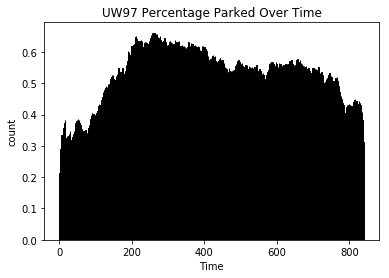

In [259]:

import numpy as np
import random
from matplotlib import pyplot as plt

data = runningcountl

n = np.arange(840)

# fixed bin size
#bins = np.arange(0, 1, .05) # fixed bin size

#plt.xlim([min(data)-.05, max(data)+.05])

plt.bar(n, height=data)
plt.title('UW97 Percentage Parked Over Time')
plt.xlabel('Time')
plt.ylabel('count')

plt.show()


#runningcountl.hist()

[968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968

In [355]:
# TIMES IN OPERATION
times_op = []
for eachH in np.arange(6,22):
    for eachM in np.arange(0,60, 15):
        times_op.append([eachH, eachM])
len(times_op)

64

In [415]:
temp = full_data2[full_data2["Pole"] == "UW97"]
  
lst_of_lsts = []
#for helper in np.unique(full_data["StartDate"]):
#for helper in modow[0]:
    #modow:
        #print(helper)
temp1 = temp[(temp["m"] == modow[1][0])][temp["dow"] == modow[2][1]][['StartDate','StartHour','StartMinute','EndHour','EndMinute']]
       

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['2015-01-06', '2015-01-13', '2015-01-20', '2015-01-27',
       '2016-01-05', '2016-01-12', '2016-01-19', '2016-01-26',
       '2017-01-03', '2017-01-10', '2017-01-17', '2017-01-24',
       '2017-01-31'], dtype=object)

In [409]:
temp[(temp["m"] == modow[23][0])]#temp["dow"] == modow[2][1]]

Empty DataFrame
Columns: [Pole, ParkingStartDate, ParkingEndDate, TransactionType, TotalCredit, DifferenceAsDateTime, StartDate, StartHour, StartMinute, EndDate, EndHour, EndMinute, m, dow]
Index: []

In [418]:
#THIS CODE NEEDS TO BE ADJUSTED BUT BASICALLY IT GOES THROUGH EVERY TIME IN OPERATION, 
# FOR EVERY DATE FOR A SPECIFIC METER AND TELLS YOU THE PROPORTION OF TIME THAT METER WAS OPEN VS TAKEN..
# IMPORTANT. REALLY IMPORTANT.


def when_is_the_station_open(pole):
    
    temp = full_data2[full_data2["Pole"] == pole]
  
    lst_of_lsts = []
    #for helper in np.unique(full_data["StartDate"]):
    for helper in modow:
    #modow:
        #print(helper)
        temp1 = temp[(temp["m"] == helper[0])][temp["dow"] == helper[1]][['StartHour','StartMinute','EndHour','EndMinute']]

        lst = []
        timechecktest = []
        ans = []
        for time_tobe_checked in times_op:
            for each in np.arange(len(temp1)):

                # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                        # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                            # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)
                     
                     #b1temp1.iloc[0]["StartHour"]

                
                if (int(temp1.iloc[each]["StartHour"]) == int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1.iloc[each]["StartMinute"])):
                        if (int(time_tobe_checked[1]) <= int(temp1.iloc[each]["EndMinute"])):
                            lst.append("Taken")
                            #print(time_tobe_checked)
                            timechecktest.append(time_tobe_checked)
                        else:
                            lst.append("Open")
                    else:
                        lst.append("Open")

                 # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                    # THEN IF START MIN IS LESS OR EQUAL - TRUE
                    # ELSE FALSE

                elif (int(temp1.iloc[each]["StartHour"]) == int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) != int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1.iloc[each]["StartMinute"])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

                # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                    # THEN IF END MIN IS MORE OR EQUAL - TRUE
                    # ELSE FALSE


                elif (int(temp1.iloc[each]["StartHour"]) != int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) <= int(temp1.iloc[each]["EndMinute"])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
                else:
                    lst.append("Open")
        for each_ in times_op:
            if each_ in timechecktest:
                #print("Taken - ",each_)
                ans.append([1,each_])
            else:
                #print("Open - ",each_)
                ans.append([0,each_])
        lst_of_lsts.append(ans)
    return lst_of_lsts


In [419]:
#RUNS THROUGH FOR EVERY METER.
lst_of_lsts_of_lsts = []
for each in poles_list:
    print(each)
    lst_of_lsts_of_lsts.append(when_is_the_station_open(each))
lst_of_lsts_of_lsts

B1


C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


B10
B100
B102
B104
B106
B108
B11
B110
B12
B13
B14
B15
B157
B159
B16
B160
B161
B163
B165
B167
B168
B17
B170
B172
B174
B18
B180
B182
B184
B186
B188
B19
B2
B20
B201
B203
B205
B207
B209
B211
B215
B217
B219
B22
B221
B223
B226
B228
B230
B232
B234
B236
B24
B251
B253
B255
B257
B259
B26
B261
B270
B272
B274
B276
B278
B280
B3
B4
B5
B501
B502
B503
B504
B505
B506
B507
B508
B509
B51
B510
B511


KeyboardInterrupt: 

64

In [421]:
with open('your_file.txt', 'w') as f:
    for item in lst_of_lsts_of_lsts:
        f.write("%s\n" % item)

In [361]:
poles_list = np.unique(operationalmeters[3])
len(poles_list)

4139

In [360]:
operationalmeters[3]

array(['C401', 'C403', 'C728', ..., 'UE684', 'UE686', 'UE688'],
      dtype='<U6')

In [398]:
modow[0]

[1, 0]

In [362]:
#LIST OF METERS
poles_list

array(['B1', 'B10', 'B100', ..., 'WT5', 'WT7', 'WT9'], dtype='<U6')

In [313]:
b1 = full_data[full_data["Pole"] == "B1" & ]
b1
#.where("Pole", are.equal_to('B1'))

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
4807       B1  2015-01-02 11:53:31  2015-01-02 12:13:31            Cash   
5717       B1  2015-01-02 12:27:27  2015-01-02 14:27:27            Cash   
10542      B1  2015-01-02 15:40:02  2015-01-02 16:04:02            Cash   
32967      B1  2015-01-03 16:15:05  2015-01-03 17:39:05            Cash   
36772      B1  2015-01-05 08:48:47  2015-01-05 11:08:47     Credit Card   
37991      B1  2015-01-05 09:59:59  2015-01-05 12:16:48            Cash   
40434      B1  2015-01-05 12:06:56  2015-01-05 14:36:48            Cash   
45274      B1  2015-01-05 15:27:10  2015-01-05 15:35:10            Cash   
54106      B1  2015-01-06 08:52:06  2015-01-06 10:00:06            Cash   
54535      B1  2015-01-06 09:25:14  2015-01-06 10:40:05     Credit Card   
55830      B1  2015-01-06 11:12:39  2015-01-06 14:12:39     Credit Card   
61724      B1  2015-01-06 16:34:12  2015-01-06 17:30:12            Cash   
62395      B1  2015-01-06 17:21:06  2015-01-06 20:21:06     Credit Card   
69147      B1  2015-01-07 08:53:30  2015-01-07 09:33:30     Credit Card   
69683      B1  2015-01-07 09:22:26  2015-01-07 12:22:26     Credit Card   
72696      B1  2015-01-07 12:03:50  2015-01-07 15:03:50     Credit Card   
77302      B1  2015-01-07 15:04:19  2015-01-07 17:04:19     Credit Card   
86849      B1  2015-01-08 08:46:23  2015-01-08 09:46:23            Cash   
88384      B1  2015-01-08 10:05:17  2015-01-08 11:17:17            Cash   
90376      B1  2015-01-08 11:40:34  2015-01-08 11:44:34            Cash   
91577      B1  2015-01-08 12:22:29  2015-01-08 13:02:29            Cash   
92689      B1  2015-01-08 13:05:29  2015-01-08 13:37:29            Cash   
93290      B1  2015-01-08 13:27:53  2015-01-08 14:17:29            Cash   
105166     B1  2015-01-09 08:05:17  2015-01-09 08:37:17            Cash   
105966     B1  2015-01-09 08:49:16  2015-01-09 08:57:16            Cash   
105967     B1  2015-01-09 08:49:26  2015-01-09 09:01:16            Cash   
105968     B1  2015-01-09 08:49:40  2015-01-09 09:21:16            Cash   
106635     B1  2015-01-09 09:18:43  2015-01-09 10:25:16            Cash   
106690     B1  2015-01-09 09:22:14  2015-01-09 12:22:14            Cash   
108045     B1  2015-01-09 10:28:49  2015-01-09 13:22:14            Cash   
...       ...                  ...                  ...             ...   
18981347   B1  2017-10-20 20:24:59  2017-10-20 21:24:59            Cash   
18981348   B1  2017-10-20 20:25:17  2017-10-20 22:00:01            Cash   
18987061   B1  2017-10-11 08:12:37  2017-10-11 11:12:37     Credit Card   
18993880   B1  2017-10-21 09:21:21  2017-10-21 10:21:21            Cash   
18997190   B1  2017-10-11 11:48:59  2017-10-11 14:48:59     Credit Card   
19002220   B1  2017-10-11 15:28:13  2017-10-11 17:28:13     Credit Card   
19008906   B1  2017-10-21 12:04:47  2017-10-21 14:04:47     Credit Card   
19011695   B1  2017-10-11 19:40:25  2017-10-11 20:40:25     Credit Card   
19014538   B1  2017-10-11 20:53:27  2017-10-11 21:33:27     Credit Card   
19014757   B1  2017-10-11 21:40:15  2017-10-11 22:00:00     Credit Card   
19017010   B1  2017-10-25 11:02:34  2017-10-25 14:02:34     Credit Card   
19019870   B1  2017-10-12 08:38:25  2017-10-12 11:18:25     Credit Card   
19021254   B1  2017-10-12 10:17:56  2017-10-12 13:17:56     Credit Card   
19027655   B1  2017-10-21 15:48:00  2017-10-21 18:48:00     Credit Card   
19032617   B1  2017-10-26 17:50:21  2017-10-26 18:10:21            Cash   
19033192   B1  2017-10-26 18:49:14  2017-10-26 21:49:14     Credit Card   
19039710   B1  2017-10-27 10:36:29  2017-10-27 11:20:01            Cash   
19039821   B1  2017-10-27 07:56:00  2017-10-27 09:20:00     Credit Card   
19045593   B1  2017-10-27 08:48:19  2017-10-27 11:00:01            Cash   
19051297   B1  2017-10-27 14:13:03  2017-10-27 15:01:03            Cash   
19060976   B1  2017-10-30 08:07:28  2017-10-30 11:07:28     Credit Card   
19069348   B1  2017-10-30 11:07:25

In [317]:
b1temp1 = b1[b1["StartDate"] == '2015-01-02'][['StartHour','StartMinute','EndHour','EndMinute']]
b1temp1

StartHour StartMinute EndHour EndMinute
4807         11          53      12        13
5717         12          27      14        27
10542        15          40      16        04

In [337]:
b1temp1.iloc[0]["StartHour"]
#b1temp1["StartHour"][4807]

'11'

# USING SEARCHING FOR PARKING DATA.

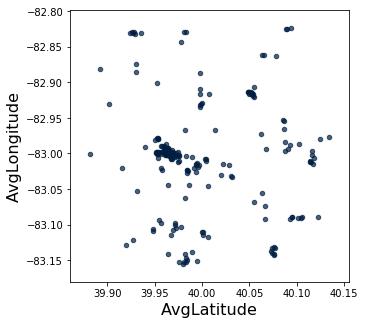

In [262]:
searchingForParking = Table().read_table('urbaninfrastructure_searchingforparking_csv_searchingforparking.csv')
searchingForParking.scatter("AvgLatitude","AvgLongitude")

In [270]:
searchingForParking.where("PercentSearching", are.above(.5))

ParkingGeohash | AvgLatitude | AvgLongitude | City     | County   | State | Country                  | ISO_3166_2 | AvgTimeToPark | AvgTimeToParkRatio | TotalSearching | PercentSearching | AvgUniqueGeohashes | AvgTotalGeohashes | CirclingDistribution                                         | HourlyDistribution                                           | PercentCar | PercentMPV | PercentLDT | PercentMDT | PercentHDT | PercentOther | UpdateDate | Version
dphgup7        | 40.0743     | -83.1396     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 3.3389        | 2.0977             | 9              | 0.5294           | 5                  | 7.8889            | {"dphgups":0.0296, "dphgupk":0.1662, "dphgup5":0.2132, " ... | {"00": null, "01": null, "02": null, "03": null, "04": n ... | 0          | 0          | 0          | 0          | 0.8889     | 0.1111       | 2018-05-02 | 1.1
dpj591q        | 39.998      | -82.9161     | Columbus | Franklin | Ohio  | United States of America | US-OH      | 3.0306        | 1.025              | 6              | 0.5455           | 6                  | 8                 | {"dpj591x":0.1029, "dpj591w":0.0703, "dpj591m":0.1932, " ... | {"00": null, "01": null, "02": null, "03": null, "04": 0 ... | 0.3333     | 0.5        | 0.1667     | 0          | 0          | 0            | 2018-05-02 | 1.1

In [265]:
searchingForParking["HourlyDistribution"]

array(['{"00": null, "01": null, "02": null, "03": 0.2, "04": 0.2, "05": 0.2, "06": 0.2, "07": null, "08": null, "09": null, "10": 0.2, "11": null, "12": null, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": 0.1429, "04": null, "05": 0.1429, "06": 0.1429, "07": 0.1429, "08": null, "09": 0.1429, "10": 0.1429, "11": 0.1429, "12": null, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": null, "04": null, "05": null, "06": null, "07": 0.2, "08": 0.2, "09": 0.2, "10": 0.2, "11": null, "12": 0.2, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": null, "04": null, "05": 0.2, "06": 0.2, "07": nu

In [369]:
DoW = (list(np.arange(0,7))*158)[4:1100]
act_dates = np.unique(full_data["StartDate"])

In [365]:
len(np.unique(full_data["StartDate"]))

1096

In [ ]:
pd.options.display.max_rows=1000

In [542]:
pd.options.display.max_rows=1000
interleaved = pd.DataFrame({"m": months,
                           "dow": DoW, 
                           "StartDate": act_dates})
interleaved

m  dow   StartDate
0      1    4  2015-01-01
1      1    5  2015-01-02
2      1    6  2015-01-03
3      1    0  2015-01-04
4      1    1  2015-01-05
5      1    2  2015-01-06
6      1    3  2015-01-07
7      1    4  2015-01-08
8      1    5  2015-01-09
9      1    6  2015-01-10
10     1    0  2015-01-11
11     1    1  2015-01-12
12     1    2  2015-01-13
13     1    3  2015-01-14
14     1    4  2015-01-15
15     1    5  2015-01-16
16     1    6  2015-01-17
17     1    0  2015-01-18
18     1    1  2015-01-19
19     1    2  2015-01-20
20     1    3  2015-01-21
21     1    4  2015-01-22
22     1    5  2015-01-23
23     1    6  2015-01-24
24     1    0  2015-01-25
25     1    1  2015-01-26
26     1    2  2015-01-27
27     1    3  2015-01-28
28     1    4  2015-01-29
29     1    5  2015-01-30
30     1    6  2015-01-31
31     2    0  2015-02-01
32     2    1  2015-02-02
33     2    2  2015-02-03
34     2    3  2015-02-04
35     2    4  2015-02-05
36     2    5  2015-02-06
37     2    6  2015-02-07
38     2    0  2015-02-08
39     2    1  2015-02-09
40     2    2  2015-02-10
41     2    3  2015-02-11
42     2    4  2015-02-12
43     2    5  2015-02-13
44     2    6  2015-02-14
45     2    0  2015-02-15
46     2    1  2015-02-16
47     2    2  2015-02-17
48     2    3  2015-02-18
49     2    4  2015-02-19
50     2    5  2015-02-20
51     2    6  2015-02-21
52     2    0  2015-02-22
53     2    1  2015-02-23
54     2    2  2015-02-24
55     2    3  2015-02-25
56     2    4  2015-02-26
57     2    5  2015-02-27
58     2    6  2015-02-28
59     3    0  2015-03-01
60     3    1  2015-03-02
61     3    2  2015-03-03
62     3    3  2015-03-04
63     3    4  2015-03-05
64     3    5  2015-03-06
65     3    6  2015-03-07
66     3    0  2015-03-08
67     3    1  2015-03-09
68     3    2  2015-03-10
69     3    3  2015-03-11
70     3    4  2015-03-12
71     3    5  2015-03-13
72     3    6  2015-03-14
73     3    0  2015-03-15
74     3    1  2015-03-16
75     3    2  2015-03-17
76     3    3  2015-03-18
77     3    4  2015-03-19
78     3    5  2015-03-20
79     3    6  2015-03-21
80     3    0  2015-03-22
81     3    1  2015-03-23
82     3    2  2015-03-24
83     3    3  2015-03-25
84     3    4  2015-03-26
85     3    5  2015-03-27
86     3    6  2015-03-28
87     3    0  2015-03-29
88     3    1  2015-03-30
89     3    2  2015-03-31
90     4    3  2015-04-01
91     4    4  2015-04-02
92     4    5  2015-04-03
93     4    6  2015-04-04
94     4    0  2015-04-05
95     4    1  2015-04-06
96     4    2  2015-04-07
97     4    3  2015-04-08
98     4    4  2015-04-09
99     4    5  2015-04-10
100    4    6  2015-04-11
101    4    0  2015-04-12
102    4    1  2015-04-13
103    4    2  2015-04-14
104    4    3  2015-04-15
105    4    4  2015-04-16
106    4    5  2015-04-17
107    4    6  2015-04-18
108    4    0  2015-04-19
109    4    1  2015-04-20
110    4    2  2015-04-21
111    4    3  2015-04-22
112    4    4  2015-04-23
113    4    5  2015-04-24
114    4    6  2015-04-25
115    4    0  2015-04-26
116    4    1  2015-04-27
117    4    2  2015-04-28
118    4    3  2015-04-29
119    4    4  2015-04-30
120    5    5  2015-05-01
121    5    6  2015-05-02
122    5    0  2015-05-03
123    5    1  2015-05-04
124    5    2  2015-05-05
125    5    3  2015-05-06
126    5    4  2015-05-07
127    5    5  2015-05-08
128    5    6  2015-05-09
129    5    0  2015-05-10
130    5    1  2015-05-11
131    5    2  2015-05-12
132    5    3  2015-05-13
133    5    4  2015-05-14
134    5    5  2015-05-15
135    5    6  2015-05-16
136    5    0  2015-05-17
137    5    1  2015-05-18
138    5    2  2015-05-19
139    5    3  2015-05-20
140    5    4  2015-05-21
141    5    5  2015-05-22
142    5    6  2015-05-23
143    5    0  2015-05-24
144    5    1  2015-05-25
145    5    2  2015-05-26
146    5    3  2015-05-27
147    5    4  2015-05-28
148    5    5  2015-05-29
149    5    6  2015-05-30
150    5    0  2015-05-31
151    6    1  2015-06-01
152    6    2  2015-06-02
153

In [543]:
full_data3 = full_data2.merge(interleaved, on="StartDate", how="left")
full_data3

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
0           SI83  2015-01-01 00:09:24  2015-01-01 00:09:24            Cash   
1          UE255  2015-01-01 00:21:22  2015-01-01 00:21:22            Cash   
2            EG6  2015-01-01 00:26:42  2015-01-01 00:26:42            Cash   
3            EG6  2015-01-01 00:27:02  2015-01-01 00:27:02            Cash   
4          UE242  2015-01-01 00:27:16  2015-01-01 00:27:16            Cash   
5           B221  2015-01-01 00:45:36  2015-01-01 00:45:36            Cash   
6          UE229  2015-01-01 00:51:44  2015-01-01 00:51:44            Cash   
7          SG131  2015-01-01 01:03:04  2015-01-01 01:03:04            Cash   
8          SG131  2015-01-01 01:03:28  2015-01-01 01:03:28            Cash   
9          SO305  2015-01-01 01:22:26  2015-01-01 01:52:26            Cash   
10         UW805  2015-01-01 01:29:42  2015-01-01 01:29:42            Cash   
11         SO305  2015-01-01 01:44:32  2015-01-01 02:14:32            Cash   
12         UE206  2015-01-01 01:46:00  2015-01-01 01:46:00            Cash   
13         UE206  2015-01-01 01:46:39  2015-01-01 01:46:39            Cash   
14         UE206  2015-01-01 01:47:05  2015-01-01 01:47:05            Cash   
15         SO307  2015-01-01 01:50:58  2015-01-01 02:20:58            Cash   
16         EK157  2015-01-01 02:01:30  2015-01-01 02:01:30            Cash   
17         WAA50  2015-01-01 01:20:01  2015-01-01 01:20:01            Cash   
18         WAA50  2015-01-01 01:45:37  2015-01-01 01:45:37            Cash   
19         WAA50  2015-01-01 01:49:17  2015-01-01 01:49:17            Cash   
20         SO307  2015-01-01 02:08:10  2015-01-01 02:38:10            Cash   
21         EI122  2015-01-01 02:09:41  2015-01-01 02:09:41            Cash   
22         UE287  2015-01-01 02:39:11  2015-01-01 02:39:11            Cash   
23         UE287  2015-01-01 02:39:48  2015-01-01 02:39:48            Cash   
24          WK50  2015-01-01 02:42:07  2015-01-01 02:42:07            Cash   
25          WK50  2015-01-01 02:42:23  2015-01-01 02:42:23            Cash   
26           SG6  2015-01-01 02:47:19  2015-01-01 02:47:19            Cash   
27         UE206  2015-01-01 03:08:48  2015-01-01 03:08:48            Cash   
28         UE204  2015-01-01 03:22:29  2015-01-01 03:22:29            Cash   
29         SO309  2015-01-01 03:27:32  2015-01-01 03:57:32            Cash   
30         EK411  2015-01-01 03:27:26  2015-01-01 03:27:26            Cash   
31         SO309  2015-01-01 03:46:34  2015-01-01 04:12:32            Cash   
32         SO307  2015-01-01 03:46:42  2015-01-01 04:16:42            Cash   
33         SO301  2015-01-01 03:53:23  2015-01-01 04:23:23            Cash   
34         SO307  2015-01-01 04:04:15  2015-01-01 04:34:15            Cash   
35         SO307  2015-01-01 04:04:26  2015-01-01 04:34:26            Cash   
36         EV144  2015-01-01 01:01:55  2015-01-01 01:01:55            Cash   
37         SO309  2015-01-01 04:05:15  2015-01-01 04:27:32            Cash   
38         SO305  2015-01-01 04:07:31  2015-01-01 04:37:31     Credit Card   
39         EI120  2015-01-01 05:16:53  2015-01-01 05:16:53            Cash   
40         SO303  2015-01-01 06:06:20  2015-01-01 06:21:20            Cash   
41          WA23  2015-01-01 05:22:45  2015-01-01 05:22:45            Cash   
42          WA23  2015-01-01 05:23:15  2015-01-01 05:23:15            Cash   
43         EI160  2015-01-01 06:28:33  2015-01-01 06:28:33            Cash   
44         EI160  2015-01-01 06:28:43  2015-01-01 06:28:43            Cash   
45         SO305  2015-01-01 06:32:22  2015-01-01 06:56:22            Cash   
46         EI150  2015-01-01 07:13:34  2015-01-01 07:13:34            Cash   
47         WBB67  2015-01-01 02:09:30  2015-01-01 02:09:30            Cash   
48         UE501  2015-01-01 08:09:13  2015-01-01 08:09:13            Cash   
49         SO305  2015-01-01 08:10:48  2015-01-01 08:22:48            Cash   
50         EI118  2015-01-01 08:11

In [382]:
jan = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
feb = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
feb2 =[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
mar = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
apr = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
may = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
jun = [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]
jul = [7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7]
aug = [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
sep = [9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9]
occ = [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
nov = [11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11]
dec = [12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12]
months =jan+feb+ mar+ apr+ may+ jun+ jul+ aug+ sep+ occ+ nov+ dec+jan+feb2+ mar+ apr+ may+ jun+ jul+ aug+ sep+ occ+ nov+ dec+jan+feb+ mar+ apr+ may+ jun+ jul+ aug+ sep+ occ+ nov+ dec
len(months)

1096

In [532]:
(full_data2[(full_data2["m"] == 1)][full_data2["dow"] == 1])

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pole     ParkingStartDate       ParkingEndDate TransactionType  \
35014     EG326  2015-01-05 07:00:24  2015-01-05 10:45:24     Credit Card   
35015     EP321  2015-01-05 07:00:32  2015-01-05 17:38:02     Credit Card   
35016     NQ202  2015-01-05 07:00:47  2015-01-05 16:00:16     Credit Card   
35017     NQ202  2015-01-05 07:00:17  2015-01-05 08:30:17            Cash   
35198     EP303  2015-01-05 05:27:08  2015-01-05 14:45:00     Credit Card   
35199     ER255  2015-01-05 05:34:10  2015-01-05 14:45:00     Credit Card   
35200     EG329  2015-01-05 06:02:06  2015-01-05 14:47:06     Credit Card   
35201     EG542  2015-01-05 06:02:10  2015-01-05 18:02:10     Credit Card   
35202     NR105  2015-01-05 06:02:19  2015-01-05 11:39:49     Credit Card   
35203     EG542  2015-01-05 06:01:35  2015-01-05 10:54:05            Cash   
35204     EG504  2015-01-05 06:28:20  2015-01-05 15:50:50            Cash   
35205     EP304  2015-01-05 06:39:08  2015-01-05 16:01:38     Credit Card   
35206     EG336  2015-01-05 06:39:19  2015-01-05 16:01:49     Credit Card   
35209     EG328  2015-01-05 06:44:12  2015-01-05 17:21:42     Credit Card   
35210     EG357  2015-01-05 06:44:58  2015-01-05 12:59:58     Credit Card   
35211     EG200  2015-01-05 06:49:30  2015-01-05 16:12:00     Credit Card   
35212     EP319  2015-01-05 06:50:48  2015-01-05 07:28:18     Credit Card   
35213     EP323  2015-01-05 06:51:51  2015-01-05 15:36:51     Credit Card   
35214     EP317  2015-01-05 06:52:11  2015-01-05 15:37:11     Credit Card   
35215     EQ700  2015-01-05 06:50:37  2015-01-05 14:00:01            Cash   
35216     EG349  2015-01-05 06:55:45  2015-01-05 15:40:45     Credit Card   
35217     EG514  2015-01-05 06:58:21  2015-01-05 15:43:21     Credit Card   
35218     EP314  2015-01-05 06:58:29  2015-01-05 16:20:59     Credit Card   
35219     EP323  2015-01-05 06:52:08  2015-01-05 16:14:32            Cash   
35220     NQ308  2015-01-05 07:01:44  2015-01-05 15:09:14     Credit Card   
35221     EP362  2015-01-05 07:03:50  2015-01-05 15:48:50     Credit Card   
35222     EP308  2015-01-05 07:05:43  2015-01-05 18:20:43     Credit Card   
35223     EP354  2015-01-05 07:08:03  2015-01-05 17:08:03     Credit Card   
35224     EQ702  2015-01-05 07:10:47  2015-01-05 13:00:01            Cash   
35225     EP327  2015-01-05 07:12:36  2015-01-05 18:27:36     Credit Card   
...         ...                  ...                  ...             ...   
14496395   WA23  2017-01-10 12:07:28  2017-01-10 14:05:05            Cash   
14496396   WA23  2017-01-10 13:23:19  2017-01-10 14:09:15            Cash   
14497049  UE222  2017-01-09 21:41:02  2017-01-09 21:53:02            Cash   
14497050  UE222  2017-01-09 23:00:21  2017-01-09 23:00:21            Cash   
14497051  UE222  2017-01-10 09:25:19  2017-01-10 11:25:19            Cash   
14497052  UE222  2017-01-10 12:45:07  2017-01-10 13:21:07            Cash   
14497053  UE222  2017-01-10 12:45:20  2017-01-10 13:29:07            Cash   
14497089  UW615  2017-01-10 09:53:22  2017-01-10 10:36:52            Cash   
14501086   K541  2017-01-10 14:00:33  2017-01-10 16:28:21     Credit Card   
14501087  NG202  2017-01-10 13:59:20  2017-01-10 16:00:02            Cash   
14501598  UE269  2017-01-09 19:39:36  2017-01-09 20:19:36            Cash   
14501599  UE265  2017-01-10 14:03:17  2017-01-10 14:34:53     Credit Card   
14501600    EC2  2017-01-10 14:01:21  2017-01-10 14:14:57            Cash   
14501601  UE265  2017-01-10 12:34:54  2017-01-10 14:14:54            Cash   
14504296    SN7  2017-01-09 10:50:13  2017-01-09 12:50:13     Credit Card   
14504297    SN7  2017-01-09 13:48:43  2017-01-09 15:48:43     Credit Card   
14504298    SN7  2017-01-09 15:55:08  2017-01-09 17:15:08     Credit Card   
14504299    SN7  2017-01-10 09:19:46  2017-01-10 09:44:05            Cash   
14504300    SN7  2017-01-09 17:21:24  2017-01-09 19:21:24     Credit Card   
14504301    SN7  2017-01-10 08:04:05  2017-01-10 09:24:05            Cash   
1450430

In [548]:
modow = []
for each in np.arange(1,13):
    for each2 in np.arange(0,7):
        NUMDAYS = len(np.unique((full_data3[(full_data3["m_y"] == each)][full_data3["dow_y"] == each2])["StartDate"]))
        modow.append([each, each2, NUMDAYS])
modow

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[[1, 0, 14],
 [1, 1, 13],
 [1, 2, 13],
 [1, 3, 12],
 [1, 4, 13],
 [1, 5, 14],
 [1, 6, 14],
 [2, 0, 12],
 [2, 1, 13],
 [2, 2, 12],
 [2, 3, 12],
 [2, 4, 12],
 [2, 5, 12],
 [2, 6, 12],
 [3, 0, 13],
 [3, 1, 13],
 [3, 2, 14],
 [3, 3, 14],
 [3, 4, 14],
 [3, 5, 13],
 [3, 6, 12],
 [4, 0, 13],
 [4, 1, 12],
 [4, 2, 12],
 [4, 3, 13],
 [4, 4, 13],
 [4, 5, 13],
 [4, 6, 14],
 [5, 0, 14],
 [5, 1, 14],
 [5, 2, 14],
 [5, 3, 13],
 [5, 4, 12],
 [5, 5, 13],
 [5, 6, 13],
 [6, 0, 12],
 [6, 1, 13],
 [6, 2, 13],
 [6, 3, 13],
 [6, 4, 14],
 [6, 5, 13],
 [6, 6, 12],
 [7, 0, 14],
 [7, 1, 13],
 [7, 2, 12],
 [7, 3, 13],
 [7, 4, 13],
 [7, 5, 14],
 [7, 6, 14],
 [8, 0, 13],
 [8, 1, 14],
 [8, 2, 14],
 [8, 3, 14],
 [8, 4, 13],
 [8, 5, 12],
 [8, 6, 13],
 [9, 0, 12],
 [9, 1, 12],
 [9, 2, 13],
 [9, 3, 13],
 [9, 4, 13],
 [9, 5, 14],
 [9, 6, 13],
 [10, 0, 14],
 [10, 1, 14],
 [10, 2, 13],
 [10, 3, 12],
 [10, 4, 13],
 [10, 5, 13],
 [10, 6, 14],
 [11, 0, 13],
 [11, 1, 13],
 [11, 2, 13],
 [11, 3, 14],
 [11, 4, 13],
 [11, 5, 12],

In [432]:
times_op

[[6, 0],
 [6, 15],
 [6, 30],
 [6, 45],
 [7, 0],
 [7, 15],
 [7, 30],
 [7, 45],
 [8, 0],
 [8, 15],
 [8, 30],
 [8, 45],
 [9, 0],
 [9, 15],
 [9, 30],
 [9, 45],
 [10, 0],
 [10, 15],
 [10, 30],
 [10, 45],
 [11, 0],
 [11, 15],
 [11, 30],
 [11, 45],
 [12, 0],
 [12, 15],
 [12, 30],
 [12, 45],
 [13, 0],
 [13, 15],
 [13, 30],
 [13, 45],
 [14, 0],
 [14, 15],
 [14, 30],
 [14, 45],
 [15, 0],
 [15, 15],
 [15, 30],
 [15, 45],
 [16, 0],
 [16, 15],
 [16, 30],
 [16, 45],
 [17, 0],
 [17, 15],
 [17, 30],
 [17, 45],
 [18, 0],
 [18, 15],
 [18, 30],
 [18, 45],
 [19, 0],
 [19, 15],
 [19, 30],
 [19, 45],
 [20, 0],
 [20, 15],
 [20, 30],
 [20, 45],
 [21, 0],
 [21, 15],
 [21, 30],
 [21, 45]]

In [434]:
for each in lst_of_lsts_of_lsts[0]:

[[[0, [6, 0]],
  [0, [6, 15]],
  [0, [6, 30]],
  [0, [6, 45]],
  [0, [7, 0]],
  [0, [7, 15]],
  [0, [7, 30]],
  [0, [7, 45]],
  [0, [8, 0]],
  [0, [8, 15]],
  [0, [8, 30]],
  [0, [8, 45]],
  [0, [9, 0]],
  [0, [9, 15]],
  [0, [9, 30]],
  [0, [9, 45]],
  [0, [10, 0]],
  [0, [10, 15]],
  [0, [10, 30]],
  [0, [10, 45]],
  [0, [11, 0]],
  [0, [11, 15]],
  [0, [11, 30]],
  [0, [11, 45]],
  [0, [12, 0]],
  [0, [12, 15]],
  [0, [12, 30]],
  [0, [12, 45]],
  [0, [13, 0]],
  [0, [13, 15]],
  [0, [13, 30]],
  [0, [13, 45]],
  [0, [14, 0]],
  [0, [14, 15]],
  [0, [14, 30]],
  [0, [14, 45]],
  [0, [15, 0]],
  [0, [15, 15]],
  [0, [15, 30]],
  [0, [15, 45]],
  [0, [16, 0]],
  [0, [16, 15]],
  [0, [16, 30]],
  [0, [16, 45]],
  [0, [17, 0]],
  [0, [17, 15]],
  [0, [17, 30]],
  [0, [17, 45]],
  [0, [18, 0]],
  [0, [18, 15]],
  [0, [18, 30]],
  [0, [18, 45]],
  [0, [19, 0]],
  [0, [19, 15]],
  [0, [19, 30]],
  [0, [19, 45]],
  [0, [20, 0]],
  [0, [20, 15]],
  [0, [20, 30]],
  [0, [20, 45]],
  [0, [21, 

In [435]:
# TO DO: CAN I FIX THE TIME NOT CHANGING THING WITH MONEY PAiD


In [437]:
lst_of_lsts


[]

In [463]:
b1 = full_data2[full_data2["Pole"] == "B1"]
b1_test = b1[(b1["m"] == 10)][b1["dow"] == 1][['StartHour','StartMinute','EndHour','EndMinute']]

for time_tobe_checked in times_op:
    for each in np.arange(len(b1_test)):
        print(time_tobe_checked, each)
        #print(temp1.iloc[each]["StartHour"])

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[6, 0] 0
[6, 0] 1
[6, 0] 2
[6, 0] 3
[6, 0] 4
[6, 0] 5
[6, 0] 6
[6, 0] 7
[6, 0] 8
[6, 0] 9
[6, 0] 10
[6, 0] 11
[6, 0] 12
[6, 0] 13
[6, 0] 14
[6, 0] 15
[6, 0] 16
[6, 0] 17
[6, 0] 18
[6, 0] 19
[6, 0] 20
[6, 0] 21
[6, 0] 22
[6, 0] 23
[6, 0] 24
[6, 0] 25
[6, 0] 26
[6, 0] 27
[6, 0] 28
[6, 0] 29
[6, 0] 30
[6, 0] 31
[6, 0] 32
[6, 0] 33
[6, 0] 34
[6, 0] 35
[6, 0] 36
[6, 0] 37
[6, 0] 38
[6, 0] 39
[6, 0] 40
[6, 0] 41
[6, 0] 42
[6, 0] 43
[6, 0] 44
[6, 0] 45
[6, 0] 46
[6, 0] 47
[6, 0] 48
[6, 0] 49
[6, 0] 50
[6, 0] 51
[6, 0] 52
[6, 0] 53
[6, 0] 54
[6, 0] 55
[6, 0] 56
[6, 0] 57
[6, 0] 58
[6, 0] 59
[6, 0] 60
[6, 0] 61
[6, 0] 62
[6, 0] 63
[6, 0] 64
[6, 0] 65
[6, 0] 66
[6, 0] 67
[6, 0] 68
[6, 15] 0
[6, 15] 1
[6, 15] 2
[6, 15] 3
[6, 15] 4
[6, 15] 5
[6, 15] 6
[6, 15] 7
[6, 15] 8
[6, 15] 9
[6, 15] 10
[6, 15] 11
[6, 15] 12
[6, 15] 13
[6, 15] 14
[6, 15] 15
[6, 15] 16
[6, 15] 17
[6, 15] 18
[6, 15] 19
[6, 15] 20
[6, 15] 21
[6, 15] 22
[6, 15] 23
[6, 15] 24
[6, 15] 25
[6, 15] 26
[6, 15] 27
[6, 15] 28
[6, 15] 29


[9, 0] 13
[9, 0] 14
[9, 0] 15
[9, 0] 16
[9, 0] 17
[9, 0] 18
[9, 0] 19
[9, 0] 20
[9, 0] 21
[9, 0] 22
[9, 0] 23
[9, 0] 24
[9, 0] 25
[9, 0] 26
[9, 0] 27
[9, 0] 28
[9, 0] 29
[9, 0] 30
[9, 0] 31
[9, 0] 32
[9, 0] 33
[9, 0] 34
[9, 0] 35
[9, 0] 36
[9, 0] 37
[9, 0] 38
[9, 0] 39
[9, 0] 40
[9, 0] 41
[9, 0] 42
[9, 0] 43
[9, 0] 44
[9, 0] 45
[9, 0] 46
[9, 0] 47
[9, 0] 48
[9, 0] 49
[9, 0] 50
[9, 0] 51
[9, 0] 52
[9, 0] 53
[9, 0] 54
[9, 0] 55
[9, 0] 56
[9, 0] 57
[9, 0] 58
[9, 0] 59
[9, 0] 60
[9, 0] 61
[9, 0] 62
[9, 0] 63
[9, 0] 64
[9, 0] 65
[9, 0] 66
[9, 0] 67
[9, 0] 68
[9, 15] 0
[9, 15] 1
[9, 15] 2
[9, 15] 3
[9, 15] 4
[9, 15] 5
[9, 15] 6
[9, 15] 7
[9, 15] 8
[9, 15] 9
[9, 15] 10
[9, 15] 11
[9, 15] 12
[9, 15] 13
[9, 15] 14
[9, 15] 15
[9, 15] 16
[9, 15] 17
[9, 15] 18
[9, 15] 19
[9, 15] 20
[9, 15] 21
[9, 15] 22
[9, 15] 23
[9, 15] 24
[9, 15] 25
[9, 15] 26
[9, 15] 27
[9, 15] 28
[9, 15] 29
[9, 15] 30
[9, 15] 31
[9, 15] 32
[9, 15] 33
[9, 15] 34
[9, 15] 35
[9, 15] 36
[9, 15] 37
[9, 15] 38
[9, 15] 39
[9, 15] 40

[12, 30] 47
[12, 30] 48
[12, 30] 49
[12, 30] 50
[12, 30] 51
[12, 30] 52
[12, 30] 53
[12, 30] 54
[12, 30] 55
[12, 30] 56
[12, 30] 57
[12, 30] 58
[12, 30] 59
[12, 30] 60
[12, 30] 61
[12, 30] 62
[12, 30] 63
[12, 30] 64
[12, 30] 65
[12, 30] 66
[12, 30] 67
[12, 30] 68
[12, 45] 0
[12, 45] 1
[12, 45] 2
[12, 45] 3
[12, 45] 4
[12, 45] 5
[12, 45] 6
[12, 45] 7
[12, 45] 8
[12, 45] 9
[12, 45] 10
[12, 45] 11
[12, 45] 12
[12, 45] 13
[12, 45] 14
[12, 45] 15
[12, 45] 16
[12, 45] 17
[12, 45] 18
[12, 45] 19
[12, 45] 20
[12, 45] 21
[12, 45] 22
[12, 45] 23
[12, 45] 24
[12, 45] 25
[12, 45] 26
[12, 45] 27
[12, 45] 28
[12, 45] 29
[12, 45] 30
[12, 45] 31
[12, 45] 32
[12, 45] 33
[12, 45] 34
[12, 45] 35
[12, 45] 36
[12, 45] 37
[12, 45] 38
[12, 45] 39
[12, 45] 40
[12, 45] 41
[12, 45] 42
[12, 45] 43
[12, 45] 44
[12, 45] 45
[12, 45] 46
[12, 45] 47
[12, 45] 48
[12, 45] 49
[12, 45] 50
[12, 45] 51
[12, 45] 52
[12, 45] 53
[12, 45] 54
[12, 45] 55
[12, 45] 56
[12, 45] 57
[12, 45] 58
[12, 45] 59
[12, 45] 60
[12, 45] 61
[1

[16, 15] 11
[16, 15] 12
[16, 15] 13
[16, 15] 14
[16, 15] 15
[16, 15] 16
[16, 15] 17
[16, 15] 18
[16, 15] 19
[16, 15] 20
[16, 15] 21
[16, 15] 22
[16, 15] 23
[16, 15] 24
[16, 15] 25
[16, 15] 26
[16, 15] 27
[16, 15] 28
[16, 15] 29
[16, 15] 30
[16, 15] 31
[16, 15] 32
[16, 15] 33
[16, 15] 34
[16, 15] 35
[16, 15] 36
[16, 15] 37
[16, 15] 38
[16, 15] 39
[16, 15] 40
[16, 15] 41
[16, 15] 42
[16, 15] 43
[16, 15] 44
[16, 15] 45
[16, 15] 46
[16, 15] 47
[16, 15] 48
[16, 15] 49
[16, 15] 50
[16, 15] 51
[16, 15] 52
[16, 15] 53
[16, 15] 54
[16, 15] 55
[16, 15] 56
[16, 15] 57
[16, 15] 58
[16, 15] 59
[16, 15] 60
[16, 15] 61
[16, 15] 62
[16, 15] 63
[16, 15] 64
[16, 15] 65
[16, 15] 66
[16, 15] 67
[16, 15] 68
[16, 30] 0
[16, 30] 1
[16, 30] 2
[16, 30] 3
[16, 30] 4
[16, 30] 5
[16, 30] 6
[16, 30] 7
[16, 30] 8
[16, 30] 9
[16, 30] 10
[16, 30] 11
[16, 30] 12
[16, 30] 13
[16, 30] 14
[16, 30] 15
[16, 30] 16
[16, 30] 17
[16, 30] 18
[16, 30] 19
[16, 30] 20
[16, 30] 21
[16, 30] 22
[16, 30] 23
[16, 30] 24
[16, 30] 25
[1

[19, 0] 2
[19, 0] 3
[19, 0] 4
[19, 0] 5
[19, 0] 6
[19, 0] 7
[19, 0] 8
[19, 0] 9
[19, 0] 10
[19, 0] 11
[19, 0] 12
[19, 0] 13
[19, 0] 14
[19, 0] 15
[19, 0] 16
[19, 0] 17
[19, 0] 18
[19, 0] 19
[19, 0] 20
[19, 0] 21
[19, 0] 22
[19, 0] 23
[19, 0] 24
[19, 0] 25
[19, 0] 26
[19, 0] 27
[19, 0] 28
[19, 0] 29
[19, 0] 30
[19, 0] 31
[19, 0] 32
[19, 0] 33
[19, 0] 34
[19, 0] 35
[19, 0] 36
[19, 0] 37
[19, 0] 38
[19, 0] 39
[19, 0] 40
[19, 0] 41
[19, 0] 42
[19, 0] 43
[19, 0] 44
[19, 0] 45
[19, 0] 46
[19, 0] 47
[19, 0] 48
[19, 0] 49
[19, 0] 50
[19, 0] 51
[19, 0] 52
[19, 0] 53
[19, 0] 54
[19, 0] 55
[19, 0] 56
[19, 0] 57
[19, 0] 58
[19, 0] 59
[19, 0] 60
[19, 0] 61
[19, 0] 62
[19, 0] 63
[19, 0] 64
[19, 0] 65
[19, 0] 66
[19, 0] 67
[19, 0] 68
[19, 15] 0
[19, 15] 1
[19, 15] 2
[19, 15] 3
[19, 15] 4
[19, 15] 5
[19, 15] 6
[19, 15] 7
[19, 15] 8
[19, 15] 9
[19, 15] 10
[19, 15] 11
[19, 15] 12
[19, 15] 13
[19, 15] 14
[19, 15] 15
[19, 15] 16
[19, 15] 17
[19, 15] 18
[19, 15] 19
[19, 15] 20
[19, 15] 21
[19, 15] 22
[19, 

[21, 30] 62
[21, 30] 63
[21, 30] 64
[21, 30] 65
[21, 30] 66
[21, 30] 67
[21, 30] 68
[21, 45] 0
[21, 45] 1
[21, 45] 2
[21, 45] 3
[21, 45] 4
[21, 45] 5
[21, 45] 6
[21, 45] 7
[21, 45] 8
[21, 45] 9
[21, 45] 10
[21, 45] 11
[21, 45] 12
[21, 45] 13
[21, 45] 14
[21, 45] 15
[21, 45] 16
[21, 45] 17
[21, 45] 18
[21, 45] 19
[21, 45] 20
[21, 45] 21
[21, 45] 22
[21, 45] 23
[21, 45] 24
[21, 45] 25
[21, 45] 26
[21, 45] 27
[21, 45] 28
[21, 45] 29
[21, 45] 30
[21, 45] 31
[21, 45] 32
[21, 45] 33
[21, 45] 34
[21, 45] 35
[21, 45] 36
[21, 45] 37
[21, 45] 38
[21, 45] 39
[21, 45] 40
[21, 45] 41
[21, 45] 42
[21, 45] 43
[21, 45] 44
[21, 45] 45
[21, 45] 46
[21, 45] 47
[21, 45] 48
[21, 45] 49
[21, 45] 50
[21, 45] 51
[21, 45] 52
[21, 45] 53
[21, 45] 54
[21, 45] 55
[21, 45] 56
[21, 45] 57
[21, 45] 58
[21, 45] 59
[21, 45] 60
[21, 45] 61
[21, 45] 62
[21, 45] 63
[21, 45] 64
[21, 45] 65
[21, 45] 66
[21, 45] 67
[21, 45] 68


In [449]:
b1_test.iloc[0]["StartHour"]

'08'

In [458]:
type(full_data2.iloc[27182]["StartHour"])

numpy.int64

In [462]:
type(times_op[0][0])

numpy.int32

In [469]:
newb1_test = when_is_the_station_open_test_419("B1")
newb1_test

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


[[[], []],
 [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [538]:
full_data2["StartHour"] = pd.to_numeric(full_data2["StartHour"])
full_data2["StartMinute"] = pd.to_numeric(full_data2["StartMinute"])
full_data2["EndHour"] = pd.to_numeric(full_data2["EndHour"])
full_data2["EndMinute"] = pd.to_numeric(full_data2["EndMinute"])

In [539]:
full_data2["StartTime"] = (full_data2["StartHour"]*60)+(full_data2["StartMinute"])
full_data2["EndTime"] = (full_data2["EndHour"]*60)+(full_data2["EndMinute"])

In [540]:
full_data2

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
0          SI83  2015-01-01 00:09:24  2015-01-01 00:09:24            Cash   
1         UE255  2015-01-01 00:21:22  2015-01-01 00:21:22            Cash   
2           EG6  2015-01-01 00:26:42  2015-01-01 00:26:42            Cash   
3           EG6  2015-01-01 00:27:02  2015-01-01 00:27:02            Cash   
4         UE242  2015-01-01 00:27:16  2015-01-01 00:27:16            Cash   
5          B221  2015-01-01 00:45:36  2015-01-01 00:45:36            Cash   
6         UE229  2015-01-01 00:51:44  2015-01-01 00:51:44            Cash   
7         SG131  2015-01-01 01:03:04  2015-01-01 01:03:04            Cash   
8         SG131  2015-01-01 01:03:28  2015-01-01 01:03:28            Cash   
9         SO305  2015-01-01 01:22:26  2015-01-01 01:52:26            Cash   
10        UW805  2015-01-01 01:29:42  2015-01-01 01:29:42            Cash   
11        SO305  2015-01-01 01:44:32  2015-01-01 02:14:32            Cash   
12        UE206  2015-01-01 01:46:00  2015-01-01 01:46:00            Cash   
13        UE206  2015-01-01 01:46:39  2015-01-01 01:46:39            Cash   
14        UE206  2015-01-01 01:47:05  2015-01-01 01:47:05            Cash   
15        SO307  2015-01-01 01:50:58  2015-01-01 02:20:58            Cash   
16        EK157  2015-01-01 02:01:30  2015-01-01 02:01:30            Cash   
17        WAA50  2015-01-01 01:20:01  2015-01-01 01:20:01            Cash   
18        WAA50  2015-01-01 01:45:37  2015-01-01 01:45:37            Cash   
19        WAA50  2015-01-01 01:49:17  2015-01-01 01:49:17            Cash   
20        SO307  2015-01-01 02:08:10  2015-01-01 02:38:10            Cash   
21        EI122  2015-01-01 02:09:41  2015-01-01 02:09:41            Cash   
22        UE287  2015-01-01 02:39:11  2015-01-01 02:39:11            Cash   
23        UE287  2015-01-01 02:39:48  2015-01-01 02:39:48            Cash   
24         WK50  2015-01-01 02:42:07  2015-01-01 02:42:07            Cash   
25         WK50  2015-01-01 02:42:23  2015-01-01 02:42:23            Cash   
26          SG6  2015-01-01 02:47:19  2015-01-01 02:47:19            Cash   
27        UE206  2015-01-01 03:08:48  2015-01-01 03:08:48            Cash   
28        UE204  2015-01-01 03:22:29  2015-01-01 03:22:29            Cash   
29        SO309  2015-01-01 03:27:32  2015-01-01 03:57:32            Cash   
...         ...                  ...                  ...             ...   
19086735    EP9  2017-10-28 17:37:48  2017-10-28 18:44:05            Cash   
19086736   EP59  2017-10-28 17:39:33  2017-10-28 19:47:41     Credit Card   
19086737   WT13  2017-10-28 17:39:46  2017-10-28 20:39:46     Credit Card   
19086738  UW611  2017-10-28 17:40:03  2017-10-28 19:40:03     Credit Card   
19086739  UE582  2017-10-28 17:37:43  2017-10-28 19:35:20            Cash   
19086740   K747  2017-10-28 17:38:48  2017-10-28 18:47:02            Cash   
19086741   K747  2017-10-28 17:38:55  2017-10-28 19:07:02            Cash   
19086742  UW601  2017-10-28 17:40:21  2017-10-28 19:40:21     Credit Card   
19086743  UE313  2017-10-28 17:37:44  2017-10-28 17:53:44            Cash   
19086744   SK57  2017-10-28 17:40:34  2017-10-28 18:00:34     Credit Card   
19086745   K758  2017-10-28 17:40:48  2017-10-28 19:52:00     Credit Card   
19086746  WBB51  2017-10-28 17:39:00  2017-10-28 20:36:09            Cash   
19086747  UE337  2017-10-28 17:41:13  2017-10-28 19:41:13     Credit Card   
19086748  NH353  2017-10-28 17:41:11  2017-10-28 19:41:11     Credit Card   
19086749   K865  2017-10-28 17:41:27  2017-10-28 20:11:20     Credit Card   
19086750  UE337  2017-10-28 13:04:18  2017-10-28 14:52:22            Cash   
19086751  UE337  2017-10-28 13:38:23  2017-10-28 15:38:23     Credit Card   
19086752  UE337  2017-10-28 13:04:38  2017-10-28 15:04:38            Cash   
19086753  UE337  2017-10-28 15:12:08  2017-10-28 16:46:23            Cash   
19086754   B608  2017-10-28 17:42:08  2017-10-28 18:02:08     Credit Card   
1908675

In [537]:
full_data2["StartHour"][0]

'00'

In [479]:
8*60

480

In [ ]:
#THIS CODE NEEDS TO BE ADJUSTED BUT BASICALLY IT GOES THROUGH EVERY TIME IN OPERATION, 
# FOR EVERY DATE FOR A SPECIFIC METER AND TELLS YOU THE PROPORTION OF TIME THAT METER WAS OPEN VS TAKEN..
# IMPORTANT. REALLY IMPORTANT.


def when_is_the_station_open_test_419(pole):
    
    temp = full_data2[full_data2["Pole"] == pole]
    
    lst_of_lsts_ = []
    #for helper in np.unique(full_data["StartDate"]):
    for helper in modow:
        temp1 = temp[(temp["m"] == helper[0])][temp["dow"] == helper[1]][['StartTime','EndTime']]

        lst = []
        timechecktest = []
        ans = []
        
        test_num_cars = []
        test_len = []
        
        for time_tobe_checked in times_op2:
            num_cars = 0
            for each in np.arange(len(temp1)):
                
                    # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                        # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                            # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)
                     
                     #b1temp1.iloc[0]["StartHour"]
                if ((temp1.iloc[each]["StartTime"] <= time_tobe_checked) & (temp1.iloc[each]["EndTime"] >= time_tobe_checked)):
                
                
                #if ((temp1.iloc[each]["StartHour"]) == (time_tobe_checked[0])) & ((temp1.iloc[each]["EndHour"]) == (time_tobe_checked[0])):
                    #if ((time_tobe_checked[1]) >= (temp1.iloc[each]["StartMinute"])):
                        #if ((time_tobe_checked[1]) <= (temp1.iloc[each]["EndMinute"])):
                            
                    num_cars = num_cars + 1
                            #lst.append("Taken")
                            #print(time_tobe_checked)
                    #timechecktest.append(time_tobe_checked)
                        #else:
                            #lst.append("Open")
                            #num_cars = num_cars + 0
                    #else:
                        #lst.append("Open")
                        #num_cars = num_cars + 0

                 # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                    # THEN IF START MIN IS LESS OR EQUAL - TRUE
                    # ELSE FALSE

                #elif ((temp1.iloc[each]["StartHour"]) == (time_tobe_checked[0])) & ((temp1.iloc[each]["EndHour"]) != (time_tobe_checked[0])):
                    #if ((time_tobe_checked[1]) >= (temp1.iloc[each]["StartMinute"])):
                        #num_cars = num_cars + 1
                        #lst.append("Taken")
                        #print(time_tobe_checked)
                        #timechecktest.append(time_tobe_checked)
                    #else:
                        #lst.append("Open")
                        #num_cars = num_cars + 0

                # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                    # THEN IF END MIN IS MORE OR EQUAL - TRUE
                    # ELSE FALSE


                #elif ((temp1.iloc[each]["StartHour"]) != (time_tobe_checked[0])) & ((temp1.iloc[each]["EndHour"]) == (time_tobe_checked[0])):
                    #if ((time_tobe_checked[1]) <= (temp1.iloc[each]["EndMinute"])):
                        #num_cars = num_cars + 1
                        #lst.append("Taken")
                        #print(time_tobe_checked)
                        #timechecktest.append(time_tobe_checked)
                    #else:
                        #lst.append("Open")
                        #num_cars = num_cars + 0

            # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
                else:
                    #lst.append("Open")
                    num_cars = num_cars + 0
                test_num_cars.append(num_cars)
                test_len.append(len(temp1))
        
        #for each_ in times_op:
        #    if each_ in timechecktest:
                #print("Taken - ",each_)
        #        ans.append([1, each_])
        #    else:
                #print("Open - ",each_)
        #        ans.append([0,each_])
        lst_of_lsts_.append([test_num_cars, test_len])
    return lst_of_lsts_


In [487]:
# TIMES IN OPERATION
times_op2 = []
for eachH in np.arange(6*60, (22*60)+1, 20):
    times_op2.append(eachH)
len(times_op2)

49

In [490]:
b1 = full_data2[full_data2["Pole"] == "B1"]
b1_test = b1[(b1["m"] == 10)][b1["dow"] == 1][['StartTime','EndTime']]
b1_test

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


StartTime  EndTime
4937749         537      564
4938704         588      648
4943228         787      847
4944992         858      956
4945866         898      997
4946975         865      988
4950004        1076     1156
5069702         835      835
5187366         488      668
5187605         512      632
5189604         638      698
5190314         675      855
5191693         727      829
5192406         754      894
5196643         914      945
5197521         957     1077
5315710         511      648
5316542         558      678
5318263         653      706
5319308         700      820
5328473        1088     1108
5335162        1242     1336
11851837        543      551
11863587        759      779
11867511        796      804
11867619        811      955
11869085        666      739
11875994        686      786
11880217        724      844
11895961       1213     1304
...             ...      ...
12260521       1247     1350
12268559        786      960
12554177        828      836
12876709        511      672
12957597       1174     1251
18656290        450      713
18656291        454      979
18656856        494      674
18659252        599      719
18669774        692      812
18684349        788      818
18688638        498      618
18689425        845      905
18691087        571      631
18696357        746      771
18697271        917      947
18702777        870      911
18708301       1055     1146
18709715        977      997
18709716       1081     1183
18709717       1068     1161
18716076       1064     1184
18722656       1129     1242
18723768       1199     1319
18754998        483      871
18760583        660      800
18768009        842      902
19060973        486      566
19069345        665      845
19073118        845     1025

[69 rows x 2 columns]

In [549]:
#THIS CODE NEEDS TO BE ADJUSTED BUT BASICALLY IT GOES THROUGH EVERY TIME IN OPERATION, 
# FOR EVERY DATE FOR A SPECIFIC METER AND TELLS YOU THE PROPORTION OF TIME THAT METER WAS OPEN VS TAKEN..
# IMPORTANT. REALLY IMPORTANT.


def when_is_the_station_open_test_419(pole):
    temp = full_data3[full_data3["Pole"] == pole]
    lst_of_lsts_ = []
    for helper in modow:
        temp1 = temp[(temp["m_y"] == helper[0])][temp["dow_y"] == helper[1]][['StartTime','EndTime']]
        lengthtemp1 = len(temp1)
        lst = []
        timechecktest = []
        ans = []
        test_num_cars = []
        test_len = []
        
        for time_tobe_checked in times_op2:
            num_cars = 0
            for each in np.arange(lengthtemp1):
                if ((temp1.iloc[each]["StartTime"] <= time_tobe_checked) & (temp1.iloc[each]["EndTime"] >= time_tobe_checked)):    
                    num_cars = num_cars + 1
                else:
                    num_cars = num_cars + 0
            lst_of_lsts_.append([helper, time_tobe_checked, num_cars])
            #test_num_cars.append(num_cars)
            #test_len.append(len(temp1))
        
        #for each_ in times_op:
        #    if each_ in timechecktest:
                #print("Taken - ",each_)
        #        ans.append([1, each_])
        #    else:
                #print("Open - ",each_)
        #        ans.append([0,each_])
        #lst_of_lsts_.append([test_num_cars, test_len])
    return lst_of_lsts_


In [550]:
b1__ = when_is_the_station_open_test_419("B1")
b1__

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


[[[1, 0, 14], 360, 0],
 [[1, 0, 14], 380, 0],
 [[1, 0, 14], 400, 0],
 [[1, 0, 14], 420, 0],
 [[1, 0, 14], 440, 0],
 [[1, 0, 14], 460, 0],
 [[1, 0, 14], 480, 0],
 [[1, 0, 14], 500, 0],
 [[1, 0, 14], 520, 0],
 [[1, 0, 14], 540, 0],
 [[1, 0, 14], 560, 0],
 [[1, 0, 14], 580, 0],
 [[1, 0, 14], 600, 0],
 [[1, 0, 14], 620, 0],
 [[1, 0, 14], 640, 0],
 [[1, 0, 14], 660, 0],
 [[1, 0, 14], 680, 0],
 [[1, 0, 14], 700, 0],
 [[1, 0, 14], 720, 0],
 [[1, 0, 14], 740, 0],
 [[1, 0, 14], 760, 0],
 [[1, 0, 14], 780, 0],
 [[1, 0, 14], 800, 0],
 [[1, 0, 14], 820, 0],
 [[1, 0, 14], 840, 0],
 [[1, 0, 14], 860, 0],
 [[1, 0, 14], 880, 0],
 [[1, 0, 14], 900, 0],
 [[1, 0, 14], 920, 0],
 [[1, 0, 14], 940, 0],
 [[1, 0, 14], 960, 0],
 [[1, 0, 14], 980, 0],
 [[1, 0, 14], 1000, 0],
 [[1, 0, 14], 1020, 0],
 [[1, 0, 14], 1040, 0],
 [[1, 0, 14], 1060, 0],
 [[1, 0, 14], 1080, 0],
 [[1, 0, 14], 1100, 0],
 [[1, 0, 14], 1120, 0],
 [[1, 0, 14], 1140, 0],
 [[1, 0, 14], 1160, 0],
 [[1, 0, 14], 1180, 0],
 [[1, 0, 14], 1200, 0],


In [553]:
first500 = []
for each in poles_list[0:500]:
    print(each)
    a = when_is_the_station_open_test_419(each)
    first500.append(a)
first500[0]

B1


C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


B10
B100
B102
B104
B106
B108
B11
B110
B12
B13
B14
B15
B157
B159
B16
B160
B161
B163
B165
B167
B168
B17
B170
B172
B174
B18
B180
B182
B184
B186
B188
B19
B2
B20
B201
B203
B205
B207
B209
B211
B215
B217
B219
B22
B221
B223
B226
B228
B230
B232
B234
B236
B24
B251
B253
B255
B257
B259
B26
B261
B270
B272
B274
B276
B278
B280
B3
B4
B5
B501
B502
B503
B504
B505
B506
B507
B508
B509
B51
B510
B511
B513
B515
B517
B519
B53
B530
B532
B534
B536
B538
B540
B542
B544
B546
B548
B55
B550
B552
B554
B556
B557
B559
B561
B563
B57
B571
B573
B575
B577
B579
B581
B59
B6
B600
B601
B602
B603
B604
B605
B606
B607
B608
B609
B61
B610
B611
B614
B616
B618
B619
B620
B621
B622
B623
B624
B625
B627
B629
B63
B631
B632
B633
B634
B635
B637
B639
B640
B641
B642
B644
B646
B650
B652
B654
B656
B658
B660
B662
B664
B666
B7
B70
B700
B702
B704
B72
B720
B722
B724
B726
B728
B730
B74
B76
B78
B8
B80
B82
B84
B86
B88
B9
B90
B92
B94
B96
C201
C202
C203
C204
C205
C206
C207
C208
C209
C210
C211
C212
C213
C214
C215
C216
C217
C218
C219
C220
C221
C222
C223
C

[[[1, 0, 14], 360, 0],
 [[1, 0, 14], 380, 0],
 [[1, 0, 14], 400, 0],
 [[1, 0, 14], 420, 0],
 [[1, 0, 14], 440, 0],
 [[1, 0, 14], 460, 0],
 [[1, 0, 14], 480, 0],
 [[1, 0, 14], 500, 0],
 [[1, 0, 14], 520, 0],
 [[1, 0, 14], 540, 0],
 [[1, 0, 14], 560, 0],
 [[1, 0, 14], 580, 0],
 [[1, 0, 14], 600, 0],
 [[1, 0, 14], 620, 0],
 [[1, 0, 14], 640, 0],
 [[1, 0, 14], 660, 0],
 [[1, 0, 14], 680, 0],
 [[1, 0, 14], 700, 0],
 [[1, 0, 14], 720, 0],
 [[1, 0, 14], 740, 0],
 [[1, 0, 14], 760, 0],
 [[1, 0, 14], 780, 0],
 [[1, 0, 14], 800, 0],
 [[1, 0, 14], 820, 0],
 [[1, 0, 14], 840, 0],
 [[1, 0, 14], 860, 0],
 [[1, 0, 14], 880, 0],
 [[1, 0, 14], 900, 0],
 [[1, 0, 14], 920, 0],
 [[1, 0, 14], 940, 0],
 [[1, 0, 14], 960, 0],
 [[1, 0, 14], 980, 0],
 [[1, 0, 14], 1000, 0],
 [[1, 0, 14], 1020, 0],
 [[1, 0, 14], 1040, 0],
 [[1, 0, 14], 1060, 0],
 [[1, 0, 14], 1080, 0],
 [[1, 0, 14], 1100, 0],
 [[1, 0, 14], 1120, 0],
 [[1, 0, 14], 1140, 0],
 [[1, 0, 14], 1160, 0],
 [[1, 0, 14], 1180, 0],
 [[1, 0, 14], 1200, 0],


In [554]:
fivehundredto1000 = []
for each in poles_list[500:1000]:
    p = when_is_the_station_open_test_419(each)
    fivehundredto1000.append(p)
    print(each)
fivehundredto1000[0]

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


EE204
EE206
EE211
EE219
EE221
EE223
EE226
EE228
EE230
EE232
EE250
EE252
EE254
EE256
EE258
EE260
EE300
EE302
EE304
EE306
EE308
EE309
EE310
EE311
EE312
EE313
EE314
EE315
EE316
EE317
EE318
EE319
EE320
EE321
EE322
EE324
EE326
EE328
EE329
EE330
EE331
EE332
EE333
EE334
EE335
EE337
EE339
EE341
EE342
EE343
EE344
EE345
EE347
EE348
EE349
EE350
EE351
EE352
EE353
EE354
EE356
EE358
EE360
EF1
EF25
EF27
EF29
EF3
EF5
EF51
EF7
EG10
EG101
EG103
EG105
EG107
EG109
EG111
EG112
EG113
EG114
EG12
EG14
EG151
EG153
EG155
EG157
EG2
EG200
EG201
EG202
EG203
EG204
EG205
EG206
EG207
EG208
EG210
EG212
EG214
EG216
EG218
EG220
EG222
EG225
EG227
EG229
EG231
EG251
EG253
EG300
EG301
EG302
EG303
EG304
EG308
EG310
EG312
EG313
EG314
EG315
EG317
EG319
EG320
EG321
EG322
EG323
EG324
EG325
EG326
EG327
EG328
EG329
EG331
EG333
EG334
EG335
EG336
EG337
EG339
EG341
EG343
EG345
EG347
EG349
EG357
EG359
EG4
EG500
EG502
EG504
EG506
EG508
EG509
EG510
EG511
EG512
EG513
EG514
EG515
EG516
EG517
EG518
EG519
EG520
EG521
EG523
EG528
EG530
EG532

[[[1, 0, 14], 360, 0],
 [[1, 0, 14], 380, 0],
 [[1, 0, 14], 400, 0],
 [[1, 0, 14], 420, 0],
 [[1, 0, 14], 440, 0],
 [[1, 0, 14], 460, 0],
 [[1, 0, 14], 480, 0],
 [[1, 0, 14], 500, 0],
 [[1, 0, 14], 520, 0],
 [[1, 0, 14], 540, 0],
 [[1, 0, 14], 560, 0],
 [[1, 0, 14], 580, 0],
 [[1, 0, 14], 600, 0],
 [[1, 0, 14], 620, 0],
 [[1, 0, 14], 640, 0],
 [[1, 0, 14], 660, 0],
 [[1, 0, 14], 680, 0],
 [[1, 0, 14], 700, 0],
 [[1, 0, 14], 720, 0],
 [[1, 0, 14], 740, 0],
 [[1, 0, 14], 760, 0],
 [[1, 0, 14], 780, 0],
 [[1, 0, 14], 800, 0],
 [[1, 0, 14], 820, 0],
 [[1, 0, 14], 840, 0],
 [[1, 0, 14], 860, 0],
 [[1, 0, 14], 880, 0],
 [[1, 0, 14], 900, 0],
 [[1, 0, 14], 920, 0],
 [[1, 0, 14], 940, 0],
 [[1, 0, 14], 960, 0],
 [[1, 0, 14], 980, 0],
 [[1, 0, 14], 1000, 0],
 [[1, 0, 14], 1020, 0],
 [[1, 0, 14], 1040, 0],
 [[1, 0, 14], 1060, 0],
 [[1, 0, 14], 1080, 0],
 [[1, 0, 14], 1100, 0],
 [[1, 0, 14], 1120, 0],
 [[1, 0, 14], 1140, 0],
 [[1, 0, 14], 1160, 0],
 [[1, 0, 14], 1180, 0],
 [[1, 0, 14], 1200, 0],


In [555]:
thousandto1500 = []
for each in poles_list[1000:1500]:
    p = when_is_the_station_open_test_419(each)
    thousandto1500.append(p)
    print(each)
thousandto1500[0]

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


EN614
EN616
EN618
EN62
EN620
EN64
EN650
EN651
EN652
EN653
EN654
EN655
EN656
EN657
EN658
EN660
EN661
EN662
EN663
EN664
EN666
EN668
EN700
EN701
EN702
EN703
EN704
EN705
EN706
EN707
EN708
EN709
EN710
EN712
EN713
EN714
EN715
EN716
EN718
EN720
EN722
EN723
EN724
EN725
EN726
EN727
EN728
EN729
EN730
EN732
EN734
EN750
EN752
EN754
EN756
EN758
EO200
EO202
EP1
EP10
EP106
EP108
EP11
EP110
EP12
EP153
EP155
EP157
EP159
EP161
EP200
EP201
EP202
EP203
EP204
EP205
EP206
EP207
EP212
EP214
EP216
EP218
EP220
EP247
EP249
EP25
EP251
EP253
EP27
EP29
EP3
EP301
EP302
EP303
EP304
EP305
EP306
EP307
EP308
EP309
EP31
EP310
EP312
EP314
EP316
EP317
EP319
EP32
EP321
EP323
EP325
EP327
EP33
EP34
EP341
EP343
EP35
EP350
EP351
EP352
EP353
EP355
EP357
EP359
EP36
EP360
EP362
EP364
EP366
EP368
EP37
EP38
EP39
EP4
EP40
EP400
EP402
EP404
EP406
EP41
EP42
EP43
EP44
EP45
EP450
EP452
EP454
EP46
EP47
EP48
EP49
EP5
EP500
EP501
EP502
EP503
EP505
EP507
EP51
EP53
EP54
EP55
EP550
EP552
EP554
EP56
EP57
EP58
EP59
EP6
EP61
EP63
EP67
EP69
EP7
E

[[[1, 0, 14], 360, 0],
 [[1, 0, 14], 380, 0],
 [[1, 0, 14], 400, 0],
 [[1, 0, 14], 420, 0],
 [[1, 0, 14], 440, 0],
 [[1, 0, 14], 460, 0],
 [[1, 0, 14], 480, 0],
 [[1, 0, 14], 500, 0],
 [[1, 0, 14], 520, 0],
 [[1, 0, 14], 540, 0],
 [[1, 0, 14], 560, 0],
 [[1, 0, 14], 580, 0],
 [[1, 0, 14], 600, 0],
 [[1, 0, 14], 620, 0],
 [[1, 0, 14], 640, 0],
 [[1, 0, 14], 660, 0],
 [[1, 0, 14], 680, 0],
 [[1, 0, 14], 700, 0],
 [[1, 0, 14], 720, 0],
 [[1, 0, 14], 740, 0],
 [[1, 0, 14], 760, 0],
 [[1, 0, 14], 780, 0],
 [[1, 0, 14], 800, 0],
 [[1, 0, 14], 820, 0],
 [[1, 0, 14], 840, 0],
 [[1, 0, 14], 860, 0],
 [[1, 0, 14], 880, 0],
 [[1, 0, 14], 900, 0],
 [[1, 0, 14], 920, 0],
 [[1, 0, 14], 940, 0],
 [[1, 0, 14], 960, 0],
 [[1, 0, 14], 980, 0],
 [[1, 0, 14], 1000, 0],
 [[1, 0, 14], 1020, 0],
 [[1, 0, 14], 1040, 0],
 [[1, 0, 14], 1060, 0],
 [[1, 0, 14], 1080, 0],
 [[1, 0, 14], 1100, 0],
 [[1, 0, 14], 1120, 0],
 [[1, 0, 14], 1140, 0],
 [[1, 0, 14], 1160, 0],
 [[1, 0, 14], 1180, 0],
 [[1, 0, 14], 1200, 0],


In [557]:
with open('first500.txt', 'w') as f:
    for item in first500:
        f.write("%s\n" % item)

In [558]:
with open('fivehundredto1000.txt', 'w') as f:
    for item in fivehundredto1000:
        f.write("%s\n" % item)

In [559]:
with open('thousandto1500.txt', 'w') as f:
    for item in thousandto1500:
        f.write("%s\n" % item)

In [560]:
f1500to2000 = []
for each in poles_list[1500:2000]:
    p = when_is_the_station_open_test_419(each)
    f1500to2000.append(p)
    print(each)
f1500to2000[0]

with open('f1500to2000.txt', 'w') as f:
    for item in f1500to2000:
        f.write("%s\n" % item)

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


EX555
EX56
EX58
EX6
EX60
EX8
EY300
EY301
EY302
EY303
EY304
EY305
EY306
EY307
EY308
EY309
EY310
EY311
EY312
EY313
EY318
EY320
EY321
EY322
EY323
EY349
EY350
EY351
EY352
EY353
EY354
EY355
EY356
EY357
EY358
EY359
EY360
EY361
EY362
EY364
EY366
EY368
EY370
EY400
EY401
EY402
EY403
EY404
EY405
EY406
EY407
EY408
EY409
EY411
EY500
EY502
EY504
EY506
EY508
EY509
EY510
EY511
EY512
EY513
EY551
EY553
EY561
EY563
EY565
EY567
EY569
EY571
EY573
EY575
EZ500
EZ502
EZ504
EZ506
EZ508
EZ510
EZ512
EZ514
EZ516
EZ518
EZ520
EZ524
EZ526
F1
F10
F11
F12
F13
F14
F15
F16
F17
F18
F19
F2
F20
F21
F22
F23
F24
F25
F26
F27
F28
F29
F3
F30
F31
F32
F33
F34
F35
F36
F37
F4
F41
F42
F43
F44
F45
F46
F47
F48
F49
F5
F50
F51
F52
F53
F54
F55
F56
F57
F58
F59
F6
F7
F8
F9
G1
G10
G100
G101
G102
G103
G104
G105
G106
G107
G108
G109
G111
G12
G14
G16
G18
G19
G2
G21
G23
G25
G3
G30
G32
G34
G36
G38
G39
G4
G40
G41
G42
G43
G44
G45
G46
G47
G48
G49
G5
G50
G52
G55
G57
G6
G60
G66
G68
G7
G8
K1
K10
K100
K1000
K1001
K1002
K1003
K1004
K1005
K1006
K1007
K10

In [561]:
f2000to3000 = []
for each in poles_list[2000:3000]:
    p = when_is_the_station_open_test_419(each)
    f2000to3000.append(p)
    print(each)
f2000to3000[0]

with open('f2000to3000.txt', 'w') as f:
    for item in f2000to3000:
        f.write("%s\n" % item)

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


K569
K57
K570
K571
K572
K573
K574
K575
K576
K577
K578
K579
K58
K580
K581
K59
K6
K60
K600
K601
K602
K603
K604
K605
K606
K607
K608
K609
K61
K611
K613
K62
K620
K621
K629
K63
K631
K64
K645
K647
K649
K65
K651
K652
K653
K654
K655
K656
K657
K658
K659
K66
K660
K661
K662
K663
K664
K665
K666
K667
K668
K67
K670
K672
K674
K68
K686
K688
K69
K690
K692
K694
K696
K698
K7
K70
K700
K702
K704
K706
K708
K71
K710
K712
K716
K718
K72
K720
K722
K724
K73
K730
K732
K734
K74
K749
K75
K751
K753
K754
K755
K756
K757
K758
K759
K76
K760
K761
K763
K765
K77
K773
K775
K78
K781
K783
K79
K8
K80
K801
K803
K805
K807
K81
K811
K82
K820
K822
K824
K826
K828
K83
K830
K832
K834
K836
K838
K84
K840
K85
K86
K87
K88
K89
K891
K893
K9
K90
K900
K902
K904
K906
K908
K91
K92
K920
K922
K93
K930
K932
K934
K936
K938
K94
K940
K942
K95
K950
K951
K953
K955
K957
K96
K97
K98
K99
NG1
NG10
NG11
NG12
NG13
NG15
NG17
NG19
NG2
NG200
NG202
NG21
NG210
NG211
NG212
NG213
NG214
NG215
NG216
NG218
NG23
NG25
NG27
NG29
NG3
NG300
NG302
NG304
NG350
NG352
NG354
NG3

In [562]:
f3000on = []
for each in poles_list[3000:]:
    p = when_is_the_station_open_test_419(each)
    f3000on.append(p)
    print(each)
f3000on[0]

with open('f3000on.txt', 'w') as f:
    for item in f3000on:
        f.write("%s\n" % item)

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


SI505
SI509
SI52
SI551
SI553
SI79
SJ1
SJ2
SJ3
SJ301
SJ303
SJ305
SJ307
SJ309
SJ311
SJ4
SJ5
SJ6
SK1
SK100
SK101
SK102
SK104
SK106
SK108
SK11
SK110
SK13
SK151
SK153
SK155
SK157
SK159
SK165
SK167
SK169
SK171
SK173
SK175
SK177
SK200
SK202
SK204
SK206
SK208
SK210
SK3
SK5
SK51
SK53
SK55
SK57
SK59
SK61
SK63
SK65
SK67
SK69
SK7
SK71
SK73
SK75
SK77
SK79
SK9
SL550
SL552
SL554
SL556
SL558
SL560
SM10
SM12
SM2
SM200
SM202
SM204
SM205
SM206
SM207
SM208
SM209
SM210
SM250
SM252
SM254
SM256
SM262
SM264
SM266
SM268
SM270
SM397
SM399
SM4
SM400
SM401
SM402
SM403
SM404
SM405
SM406
SM407
SM408
SM409
SM411
SM413
SM415
SM417
SM419
SM421
SM450
SM452
SM454
SM50
SM500
SM52
SM54
SM550
SM558
SM56
SM58
SM6
SM60
SM70
SM72
SM74
SM76
SM78
SM8
SM80
SM82
SN1
SN11
SN3
SN5
SN7
SN9
SO108
SO110
SO112
SO200
SO201
SO202
SO203
SO204
SO205
SO206
SO208
SO210
SO250
SO251
SO252
SO253
SO254
SO256
SO300
SO301
SO302
SO303
SO304
SO305
SO306
SO307
SO308
SO309
SO310
SO312
SO314
SO316
SO318
SO320
SO400
SO401
SO402
SO403
SO404
SO405
SO406
S

In [569]:
full_list_of_meters_with_carsparked  = first500 + fivehundredto1000 + thousandto1500 + f1500to2000 + f2000to3000 + f3000on
full_list_of_meters_with_carsparked[3626][0]

[[1, 0, 14], 360, 0]

In [587]:
def monthdayarr_foreachmeter(month, day, pole):
    indx = np.where(poles_list==pole)[0][0]
    arr = full_list_of_meters_with_carsparked[indx]
    monthnum = (month-1) * 343
    daynum = day*49
    return arr[monthnum+daynum:monthnum+daynum+49]
monthdayarr_foreachmeter(10, 4, "WT5")

[[[10, 4, 13], 360, 0],
 [[10, 4, 13], 380, 0],
 [[10, 4, 13], 400, 0],
 [[10, 4, 13], 420, 0],
 [[10, 4, 13], 440, 1],
 [[10, 4, 13], 460, 4],
 [[10, 4, 13], 480, 8],
 [[10, 4, 13], 500, 12],
 [[10, 4, 13], 520, 13],
 [[10, 4, 13], 540, 13],
 [[10, 4, 13], 560, 13],
 [[10, 4, 13], 580, 13],
 [[10, 4, 13], 600, 13],
 [[10, 4, 13], 620, 14],
 [[10, 4, 13], 640, 17],
 [[10, 4, 13], 660, 20],
 [[10, 4, 13], 680, 14],
 [[10, 4, 13], 700, 14],
 [[10, 4, 13], 720, 13],
 [[10, 4, 13], 740, 15],
 [[10, 4, 13], 760, 13],
 [[10, 4, 13], 780, 17],
 [[10, 4, 13], 800, 19],
 [[10, 4, 13], 820, 19],
 [[10, 4, 13], 840, 19],
 [[10, 4, 13], 860, 19],
 [[10, 4, 13], 880, 19],
 [[10, 4, 13], 900, 19],
 [[10, 4, 13], 920, 17],
 [[10, 4, 13], 940, 14],
 [[10, 4, 13], 960, 15],
 [[10, 4, 13], 980, 16],
 [[10, 4, 13], 1000, 14],
 [[10, 4, 13], 1020, 9],
 [[10, 4, 13], 1040, 7],
 [[10, 4, 13], 1060, 9],
 [[10, 4, 13], 1080, 9],
 [[10, 4, 13], 1100, 9],
 [[10, 4, 13], 1120, 12],
 [[10, 4, 13], 1140, 14],
 [[1

In [592]:
def monthday_time_arr_foreachmeter(month, day, pole, time):
    indx = np.where(poles_list==pole)[0][0]
    arr = full_list_of_meters_with_carsparked[indx]
    monthnum = (month-1) * 343
    daynum = day*49
    times = (time - 360)/20
    return arr[int(monthnum+daynum+times)][2]
monthday_time_arr_foreachmeter(10, 4, "WT5", 660)

20

In [595]:
for each in modow:
    for each2 in times_op2:
        

[360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700,
 720,
 740,
 760,
 780,
 800,
 820,
 840,
 860,
 880,
 900,
 920,
 940,
 960,
 980,
 1000,
 1020,
 1040,
 1060,
 1080,
 1100,
 1120,
 1140,
 1160,
 1180,
 1200,
 1220,
 1240,
 1260,
 1280,
 1300,
 1320]

In [584]:
len(full_list_of_meters_with_carsparked[2521])/12/7

49.0

In [511]:
b1[b1["m"] == 1][b1["dow"] == 2][b1["StartTime"] <= 940][b1["EndTime"] >= 940]

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pole     ParkingStartDate       ParkingEndDate TransactionType  \
174768     B1  2015-01-13 15:33:55  2015-01-13 18:13:55            Cash   
288606     B1  2015-01-20 14:37:06  2015-01-20 17:24:36            Cash   
6867076    B1  2016-03-15 13:44:15  2016-03-15 15:14:15            Cash   
6882409    B1  2016-03-31 19:33:20  2016-03-31 19:45:20            Cash   
7435914    B1  2016-01-12 08:41:40  2016-01-12 08:57:40            Cash   
7435915    B1  2016-01-12 08:58:28  2016-01-12 11:30:28            Cash   
7435916    B1  2016-01-12 11:38:22  2016-01-12 12:58:22            Cash   
13043253   B1  2017-01-03 14:19:11  2017-01-03 14:27:11            Cash   
13043254   B1  2017-01-03 14:19:34  2017-01-03 14:55:11            Cash   
13479493   B1  2017-01-17 08:13:55  2017-01-17 10:29:55            Cash   
13511232   B1  2017-01-17 14:00:04  2017-01-17 17:00:04            Cash   
13511233   B1  2017-01-17 13:59:07  2017-01-17 16:35:59            Cash   
13808870   B1  2017-01-24 12:27:25  2017-01-24 13:18:59            Cash   
13813263   B1  2017-01-24 14:57:32  2017-01-24 16:20:31            Cash   
13976190   B1  2017-01-31 15:14:26  2017-01-31 17:20:08     Credit Card   
13982426   B1  2017-01-31 18:06:36  2017-01-31 21:06:36     Credit Card   
14413568   B1  2017-01-10 08:40:00  2017-01-10 10:39:43            Cash   
14413569   B1  2017-01-10 08:40:19  2017-01-10 11:39:43            Cash   

         TotalCredit DifferenceAsDateTime   StartDate  StartHour  StartMinute  \
174768             2             02:40:00  2015-01-13         15           33   
288606           1.5             02:47:30  2015-01-20         14           37   
6867076         0.25             01:30:00  2016-01-05         13            7   
6882409         0.15             00:12:00  2016-01-05         14           27   
7435914          0.2             00:16:00  2016-01-12          6           23   
7435915          1.9             02:32:00  2016-01-12          6           22   
7435916            1             01:20:00  2016-01-12          6           23   
13043253         0.1             00:08:00  2017-01-03         14           20   
13043254        0.35             00:35:37  2017-01-03         14           20   
13479493         1.7             02:16:00  2017-01-17          8           14   
13511232         0.4             03:00:00  2017-01-17         14           15   
13511233         1.8             02:36:52  2017-01-17         14           17   
13808870        0.05             00:51:34  2017-01-24         14           10   
13813263        0.15             01:22:59  2017-01-24         14           58   
13976190         1.5             02:05:42  2017-01-31         15           13   
13982426         1.5             03:00:00  2017-01-31         14           37   
14413568        1.25             01:59:43  2017-01-10          8           41   
14413569        0.75             02:59:24  2017-01-10          8           41   

             EndDate  EndHour  EndMinute  m  dow  StartTime  EndTime  
174768    2015-01-13       18         13  1    2        933     1093  
288606    2015-01-20       17         24  1    2        877     1044  
6867076   2016-01-05       16          7  1    2        787      967  
6882409   2016-01-05       17         27  1    2        867     1047  
7435914   2016-01-12       16          0  1    2        383      960  
7435915   2016-01-12       15         45  1    2        382      945  
7435916   2016-01-12       16          7  1    2        383      967  
13043253  2017-01-03       16         20  1    2        860      980  
13043254  2017-01-03       16         20  1    2        860      980  
13479493  2017-01-17       16         59  1    2        494     1019  
13511232  2017-01-17       17          1  1    2        855     1021  
13511233  2017-01-17       15         45  1    2        857      945  
13808870  2017-01-24       16         10  1    2        850      970  
13813263  2017-01-24       16         58  1    2 

In [526]:
a,b,c = [],[],[]
a2,b2,c2 = [],[],[]
for each in np.arange(len(full_data2)):
    
    #if each not in [1523047, 3195633,4863068]:
    if each % 50000 == 0:
        print(each)
    a.append(full_data2["ParkingStartDate"][each][0:10])
    b.append(full_data2["ParkingStartDate"][each][11:13])
    c.append(full_data2["ParkingStartDate"][each][14:16])
    a2.append(full_data2["ParkingEndDate"][each][0:10])
    b2.append(full_data2["ParkingEndDate"][each][11:13])
    c2.append(full_data2["ParkingEndDate"][each][14:16])
   
    #else: 
        #a.append(full_data["ParkingStartDate"][0][0:10])
        #b.append(full_data["ParkingStartDate"][0][11:13])
        #c.append(full_data["ParkingStartDate"][0][14:16])
        #a2.append(full_data["ParkingEndDate"][0][0:10])
        #b2.append(full_data["ParkingEndDate"][0][11:13])
        #c2.append(full_data["ParkingEndDate"][0][14:16])
full_data2["StartDate"] = a
full_data2["StartHour"] =  b
full_data2["StartMinute"] =  c
full_data2[ "EndDate"] = a2 
full_data2["EndHour"] =  b2 
full_data2["EndMinute"] =  c2
          
full_data2.tail(5)

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
1800000
1850000
1900000
1950000
2000000
2050000
2100000
2150000
2200000
2250000
2300000
2350000
2400000
2450000
2500000
2550000
2600000
2650000
2700000
2750000
2800000
2850000
2900000
2950000
3000000
3050000
3100000
3150000
3200000
3250000
3300000
3350000
3400000
3450000
3500000
3550000
3600000
3650000
3700000
3750000
3800000
3850000
3900000
3950000
4000000
4050000
4100000
4150000
4200000
4250000
4300000
4350000
4400000
4450000
4500000
4550000
4600000
4650000
4700000
4750000
4800000
4850000
4900000
4950000
5000000
5050000
5100000
5150000
5200000
5250000
5300000
5350000
5400000
5450000
5500000
5550000
5600000
5650000
5700000
5750000
5800000
5850000
5900000
5950000
6000000
6050000
6100000
6150000
6200000
6250000
6300000
6350000
64

Pole     ParkingStartDate       ParkingEndDate TransactionType  \
19086760   K162  2017-10-28 17:44:23  2017-10-28 19:32:27     Credit Card   
19086761    F59  2017-10-28 17:44:34  2017-10-28 19:44:34     Credit Card   
19086762   B542  2017-10-28 17:43:21  2017-10-28 18:03:21            Cash   
19086763    ER4  2017-10-28 17:45:02  2017-10-28 19:45:02     Credit Card   
19086764  SO452  2017-10-28 17:45:42  2017-10-28 19:45:42     Credit Card   

         TotalCredit DifferenceAsDateTime   StartDate StartHour StartMinute  \
19086760        0.75             01:48:04  2017-10-28        17          44   
19086761         1.5             02:00:00  2017-10-28        17          44   
19086762        0.25             00:20:00  2017-10-28        17          43   
19086763         1.5             02:00:00  2017-10-28        17          45   
19086764         1.5             02:00:00  2017-10-28        17          45   

             EndDate EndHour EndMinute   m  dow  StartTime  EndTime  
19086760  2017-10-28      19        32  10    6       1061     1114  
19086761  2017-10-28      19        44  10    6       1063     1183  
19086762  2017-10-28      18        03  10    6       1062     1102  
19086763  2017-10-28      19        45  10    6       1064     1172  
19086764  2017-10-28      19        45  10    6       1064     1184

In [545]:
np.unique((full_data3[(full_data3["m_y"] == 1)][full_data3["dow_y"] == 1])["StartDate"])

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['2015-01-05', '2015-01-12', '2015-01-19', '2015-01-26',
       '2016-01-04', '2016-01-11', '2016-01-18', '2016-01-25',
       '2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23',
       '2017-01-30'], dtype=object)

In [521]:
full_data2.iloc[1523048]#, 3195633,4863068]

Pole                                    ET9
ParkingStartDate        2015-03-31 11:57:37
ParkingEndDate          2015-03-31 12:47:22
TransactionType                        Cash
TotalCredit                             0.6
DifferenceAsDateTime        0 days 00:49:45
StartDate                        2015-03-31
StartHour                                11
StartMinute                              57
EndDate                          2015-03-31
EndHour                                  12
EndMinute                                47
m                                         3
dow                                       2
StartTime                               717
EndTime                                 767
Name: 1523046, dtype: object

In [525]:
5002 % 5001

1

In [546]:
modow

[[1, 0, 94],
 [1, 1, 155],
 [1, 2, 140],
 [1, 3, 129],
 [1, 4, 128],
 [1, 5, 146],
 [1, 6, 148],
 [2, 0, 72],
 [2, 1, 120],
 [2, 2, 95],
 [2, 3, 108],
 [2, 4, 118],
 [2, 5, 108],
 [2, 6, 110],
 [3, 0, 65],
 [3, 1, 112],
 [3, 2, 117],
 [3, 3, 133],
 [3, 4, 121],
 [3, 5, 118],
 [3, 6, 105],
 [4, 0, 75],
 [4, 1, 101],
 [4, 2, 97],
 [4, 3, 97],
 [4, 4, 104],
 [4, 5, 116],
 [4, 6, 114],
 [5, 0, 72],
 [5, 1, 105],
 [5, 2, 94],
 [5, 3, 87],
 [5, 4, 85],
 [5, 5, 93],
 [5, 6, 93],
 [6, 0, 56],
 [6, 1, 87],
 [6, 2, 77],
 [6, 3, 75],
 [6, 4, 96],
 [6, 5, 91],
 [6, 6, 70],
 [7, 0, 70],
 [7, 1, 114],
 [7, 2, 99],
 [7, 3, 122],
 [7, 4, 113],
 [7, 5, 113],
 [7, 6, 113],
 [8, 0, 63],
 [8, 1, 110],
 [8, 2, 88],
 [8, 3, 96],
 [8, 4, 78],
 [8, 5, 84],
 [8, 6, 87],
 [9, 0, 68],
 [9, 1, 91],
 [9, 2, 96],
 [9, 3, 98],
 [9, 4, 105],
 [9, 5, 111],
 [9, 6, 100],
 [10, 0, 88],
 [10, 1, 148],
 [10, 2, 107],
 [10, 3, 104],
 [10, 4, 100],
 [10, 5, 123],
 [10, 6, 131],
 [11, 0, 69],
 [11, 1, 118],
 [11, 2, 116],
 [

In [596]:
tstdf = pd.DataFrame([])
tstdf

Empty DataFrame
Columns: []
Index: []

In [599]:
df_poles_and_times = pd.DataFrame([])
for each in poles_list:
    

a
0  1
1  2

In [604]:
noway = [v for t,u,v in full_list_of_meters_with_carsparked[0][0]]
noway

TypeError: cannot unpack non-iterable numpy.int32 object

In [609]:
firstmeter_test = []
for each in full_list_of_meters_with_carsparked[0]:
    firstmeter_test.append(each[2])
firstmeter_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 7,
 10,
 10,
 13,
 14,
 13,
 11,
 13,
 7,
 8,
 10,
 11,
 13,
 12,
 11,
 9,
 8,
 7,
 8,
 5,
 4,
 7,
 4,
 5,
 6,
 5,
 5,
 4,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 7,
 14,
 14,
 16,
 18,
 20,
 17,
 17,
 14,
 13,
 12,
 10,
 10,
 15,
 13,
 10,
 13,
 15,
 16,
 13,
 14,
 15,
 14,
 15,
 12,
 11,
 8,
 7,
 3,
 2,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 3,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 7,
 5,
 10,
 15,
 14,
 14,
 13,
 12,
 13,
 14,
 14,
 14,
 11,
 10,
 12,
 13,
 13,
 13,
 13,
 12,
 9,
 10,
 11,
 13,
 10,
 7,
 7,
 6,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 6,
 11,
 15,
 16,
 16,
 18,
 16,
 16,
 13,
 11,
 14,
 12,
 9,
 12,
 12,
 11,
 11,
 9,
 6,
 6,
 8,
 9,
 7,
 7,
 7,
 6,
 4,
 4

In [610]:
len(firstmeter_test)

4116

In [620]:
df_poles_and_times = pd.DataFrame([])

moths = []
daytes = []
howmany = []
tiems = []
for each in full_list_of_meters_with_carsparked[0]:
    moths.append(each[0][0])
    daytes.append(each[0][1])
    howmany.append(each[0][2])
    tiems.append(each[1])
df_poles_and_times["Months"] = moths
df_poles_and_times["DayOfWeek"] = daytes 
df_poles_and_times["NumberOfMoDoW"] = howmany 
df_poles_and_times["TimeOnDay"] = tiems
df_poles_and_times

Months  DayOfWeek  NumberOfMoDoW  TimeOnDay
0          1          0             14        360
1          1          0             14        380
2          1          0             14        400
3          1          0             14        420
4          1          0             14        440
5          1          0             14        460
6          1          0             14        480
7          1          0             14        500
8          1          0             14        520
9          1          0             14        540
10         1          0             14        560
11         1          0             14        580
12         1          0             14        600
13         1          0             14        620
14         1          0             14        640
15         1          0             14        660
16         1          0             14        680
17         1          0             14        700
18         1          0             14        720
19         1          0             14        740
20         1          0             14        760
21         1          0             14        780
22         1          0             14        800
23         1          0             14        820
24         1          0             14        840
25         1          0             14        860
26         1          0             14        880
27         1          0             14        900
28         1          0             14        920
29         1          0             14        940
30         1          0             14        960
31         1          0             14        980
32         1          0             14       1000
33         1          0             14       1020
34         1          0             14       1040
35         1          0             14       1060
36         1          0             14       1080
37         1          0             14       1100
38         1          0             14       1120
39         1          0             14       1140
40         1          0             14       1160
41         1          0             14       1180
42         1          0             14       1200
43         1          0             14       1220
44         1          0             14       1240
45         1          0             14       1260
46         1          0             14       1280
47         1          0             14       1300
48         1          0             14       1320
49         1          1             13        360
50         1          1             13        380
51         1          1             13        400
52         1          1             13        420
53         1          1             13        440
54         1          1             13        460
55         1          1             13        480
56         1          1             13        500
57         1          1             13        520
58         1          1             13        540
59         1          1             13        560
60         1          1             13        580
61         1          1             13        600
62         1          1             13        620
63         1          1             13        640
64         1          1             13        660
65         1          1             13        680
66         1          1             13        700
67         1          1             13        720
68         1          1             13        740
69         1          1             13        760
70         1          1             13        780
71         1          1             13        800
72         1          1             13        820
73         1          1             13        840
74         1          1             13        860
75         1          1             13        880
76         1          1             13        900
77         1          1             13        920
78         1          1             13        940
79    

In [621]:
df_poles_and_times["MoDaTimes"][0][0]

KeyError: 'MoDaTimes'

In [622]:
for each in np.arange(len(poles_list)):
    storage_of_2s = []
    for each2 in full_list_of_meters_with_carsparked[each]:
        storage_of_2s.append(each2[2])
    df_poles_and_times[poles_list[each]] = storage_of_2s
df_poles_and_times

Months  DayOfWeek  NumberOfMoDoW  TimeOnDay  B1  B10  B100  B102  B104  \
0          1          0             14        360   0    0     0     0     0   
1          1          0             14        380   0    0     0     0     0   
2          1          0             14        400   0    0     0     0     0   
3          1          0             14        420   0    0     0     0     0   
4          1          0             14        440   0    0     0     0     0   
5          1          0             14        460   0    0     0     0     0   
6          1          0             14        480   0    0     0     0     0   
7          1          0             14        500   0    0     0     0     0   
8          1          0             14        520   0    0     0     0     0   
9          1          0             14        540   0    0     0     0     0   
10         1          0             14        560   0    0     0     0     0   
11         1          0             14        580   0    0     0     0     0   
12         1          0             14        600   0    0     0     0     0   
13         1          0             14        620   0    0     0     0     0   
14         1          0             14        640   0    0     0     0     0   
15         1          0             14        660   0    0     0     0     0   
16         1          0             14        680   0    0     0     0     0   
17         1          0             14        700   0    0     0     0     0   
18         1          0             14        720   0    0     0     0     0   
19         1          0             14        740   0    0     0     0     0   
20         1          0             14        760   0    0     0     0     0   
21         1          0             14        780   0    0     0     0     0   
22         1          0             14        800   0    0     0     0     0   
23         1          0             14        820   0    0     0     0     0   
24         1          0             14        840   0    0     0     0     0   
25         1          0             14        860   0    0     0     0     0   
26         1          0             14        880   0    0     0     0     0   
27         1          0             14        900   0    0     0     0     0   
28         1          0             14        920   0    0     0     0     0   
29         1          0             14        940   0    0     0     0     0   
30         1          0             14        960   0    0     0     0     0   
31         1          0             14        980   0    0     0     0     0   
32         1          0             14       1000   0    0     0     0     0   
33         1          0             14       1020   0    0     0     0     0   
34         1          0             14       1040   0    0     1     0     0   
35         1          0             14       1060   0    0     0     0     0   
36         1          0             14       1080   0    0     0     0     0   
37         1          0             14       1100   0    0     0     0     0   
38         1          0             14       1120   0    0     0     0     0   
39         1          0             14       1140   0    0     0     0     0   
40         1          0             14       1160   0    0     0     0     0   
41         1          0             14       1180   0    0     0     0     0   
42         1          0             14       1200   0    0     0     0     0   
43         1          0             14       1220   0    0     0     0     0   
44         1          0             14       1240   0    0     0     0     0   
45         1          0             14       1260   0    0     0     0     0   
46         1          0             14       1280   0    0     0     0     0   
47         1          0             14       1300   0    0     0     0     0   
48         1          0             14       1320   0    0     0     0     0   
49    

In [623]:
df_poles_and_times.to_csv("NumberOfCarsParkedAtEachPoleAtEachTime2.csv")